This notebook makes time series predictions \\
 \\
How to use it: \\
 \\
For every model (RNN and ARIMA): \\
 \\
Run all cells from "Importation", "Model", "Get data from files" and "Useful functions" \\
In the "Main" part, run "Columns and files" \\
 \\
For the Recurrent Neural Networks model: \\
 \\
In the "Build X and y" Section of "Main", choose the value of the parameters and run the section to build the dataset. \\
"Train" and "Test" should be run respectively for the cross validation and the testing after choosing the value of the parameters. \\
 \\
For the ARIMA model: \\
 \\
In the "Section for ARIMA model", \\
Run "function" and "build dataset" after chossing the dataset you want to use. \\
Run the "Test" part for the testing.


In [1]:
!nvitop -m

)07=Sat Oct 28 21:48:20 2023
╒═════════════════════════════════════════════════════════════════════════════╕
│ NVITOP 1.3.0      Driver Version: 535.104.12      CUDA Driver Version: 12.2 │
├───────────────────────────────┬──────────────────────┬──────────────────────┤
│ GPU  Name        Persistence-M│ Bus-Id        Disp.A │ Volatile Uncorr. ECC │
│ Fan  Temp  Perf  Pwr:Usage/Cap│         Memory-Usage │ GPU-Util  Compute M. │
╞═══════════════════════════════╪══════════════════════╪══════════════════════╡
│   0  GeForce RTX 4090    On   │ 00000000:01:00.0 Off │                  N/A │
│ 32%   55C    P2   142W / 480W │   6713MiB / 23.99GiB │     99%      Default │
╘═══════════════════════════════╧══════════════════════╧══════════════════════╛
[ CPU: ████████████▋ 42.1%                ]  ( Load Average:  8.98  8.12  7.83 )
[ MEM: ██████████████████▋ 61.9%          ]  [ SWP: █████████████████▎ 78.2%   ]

╒══════════════════════════════════════════════════════════════════════════════╕
│ Pr

In [2]:
!nvidia-smi

Sat Oct 28 21:48:22 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:01:00.0 Off |                  Off |
| 32%   55C    P2             141W / 480W |   6713MiB / 24564MiB |     99%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# !source activate
# !conda deactivate

In [4]:
!conda env list
# !conda activate sheng-ru
# !conda env list

# conda environments:
#
                         /home/wmnlab/Documents/r11942156/trySomething/.conda
base                     /home/wmnlab/anaconda3
Yong-Tai                 /home/wmnlab/anaconda3/envs/Yong-Tai
bacteremia               /home/wmnlab/anaconda3/envs/bacteremia
bill                     /home/wmnlab/anaconda3/envs/bill
chat                     /home/wmnlab/anaconda3/envs/chat
chatglm_etuning          /home/wmnlab/anaconda3/envs/chatglm_etuning
fubon                    /home/wmnlab/anaconda3/envs/fubon
ldm                      /home/wmnlab/anaconda3/envs/ldm
py9                      /home/wmnlab/anaconda3/envs/py9
sheng-ru              *  /home/wmnlab/anaconda3/envs/sheng-ru
tensorflow210            /home/wmnlab/anaconda3/envs/tensorflow210
test                     /home/wmnlab/anaconda3/envs/test
yenKuo                   /home/wmnlab/anaconda3/envs/yenKuo
yu                       /home/wmnlab/anaconda3/envs/yu



In [2]:
# !conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import csv
import datetime as dt
from tqdm.notebook import tqdm

# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import torch
import random

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn import preprocessing

plt.style.use('default')
os.environ["CUDA_VISIBLE_DEVICES"]="0"

2023-10-28 22:05:15.144505: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
def ts_array_create(dirname, dir_list, time_seq):


    columns = ['RSRP', 'RSRQ', 'RSRP1', 'RSRQ1', 'RSRP2', 'RSRQ2',
                'nr-RSRP', 'nr-RSRQ', 'nr-RSRP1', 'nr-RSRQ1', 'nr-RSRP2', 'nr-RSRQ2']
        
    
    split_time = []
    
    for i, f in enumerate(tqdm(dir_list)):

        f = os.path.join(dirname, f)
        df = pd.read_csv(f)
        
        # preprocess data with ffill method
        del df['Timestamp'], df['lat'], df['long'], df['gpsspeed']
        # df[columns] = df[columns].replace(0, np.nan)
        # df[columns] = df[columns].fillna(method='ffill')
        # df.dropna(inplace=True)
        # df.replace(np.nan,0,inplace=True); df.replace('-',0,inplace=True)
        
        X = df[features]
        Y = df[target]

        Xt_list = []

        for j in range(time_seq):
            X_t = X.shift(periods=-j)
            Xt_list.append(X_t)

        X_ts = np.array(Xt_list); X_ts = np.transpose(X_ts, (1,0,2)); X_ts = X_ts[:-(time_seq),:,:]
        
        Y = Y.to_numpy()
        Y = [1 if sum(y) > 0 else 0 for y in Y]
        
        YY = []
        
        for j in range(time_seq, len(Y)):
            count = 0
            for k in range(j, len(Y)):
                count += 1
                if Y[k] != 0:
                    break
            YY.append(count)
            
        YY = np.array(YY)    

        split_time.append(len(X_ts))

        if i == 0:
            X_final = X_ts
            Y_final = YY
        else:
            X_final = np.concatenate((X_final,X_ts), axis=0)
            Y_final = np.concatenate((Y_final,YY), axis=0)

        
    split_time = [(sum(split_time[:i]), sum(split_time[:i])+x) for i, x in enumerate(split_time)]

    return  X_final, Y_final, split_time # forecast HO

In [7]:
def days_in_file(file, dates):
    
    for date in dates:
        if date in file: return True 
    return False

def train_valid_split(L, valid_size=0.2, rand=False):
    length = len(L)
    v_num = int(length*valid_size)
    if v_num == 0:
        v_num = 1
    v_files = random.sample(L, v_num)
    t_num = len(list(set(L) - set(v_files)))
    if t_num == 0:
        t_files = L
    else:
        t_files = list(set(L) - set(v_files))
    
    return t_files, v_files

def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    print(f"Random seed set as {seed}")

In [8]:
# Time sequence length and prediction time length
seed = 55688
time_seq = 20
predict_t = 10
valid_ratio = 0.2

data = 0   # 0=dataset1 - 1=dataset2 - 2=dataset3
c =  3  # 0=lat with all features - 1=only lat - 2=change - 3=change with 3 feat - 4=enlarged loss - 5=loss

t_step = 20    # time taken in the input
t_pred = 0     # time before the prediction

# feat = len(col[c])
feat=16
input_shape = (t_step, feat)

hunits = 100
nb_layer = 4
act = ['tanh','tanh']
ep = 1

# Xtrain,ytrain,Xtest,ytest, Ma, Mi = dataset(csvfile[data], col[c], c, t_step, t_pred)

In [9]:
# Setup seed
set_seed(seed)

# Get GPU
device_count = torch.cuda.device_count()
num_of_gpus = device_count

for i in range(device_count):
    print("GPU {}: {}".format(i, torch.cuda.get_device_name(i)))
    gpu_id = i

# Save best model to 
save_path = "./model"

# Define DataSet
dirname = "/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single"
# dirname = "/home/wmnlab/Documents/sheng-ru/data/single0.5"
dir_list = os.listdir(dirname)
dir_list = [f for f in dir_list if ( f.endswith('.csv') and (not 'sm' in f) ) ] # Take out cell phone data

# train_dates = ['03-26', '04-01']
# test_dates = ['04-10']
    
# train_dir_list = [f for f in dir_list if ( f.endswith('.csv') and ('All' in f) and days_in_file(f, train_dates) )]
# test_dir_list = [f for f in dir_list if ( f.endswith('.csv') and ('All' in f) and days_in_file(f, test_dates) )]

# train_dir_list += [f for f in os.listdir(dirname) if 'sm' in f] # Add cell phone data.

# features = ['LTE_HO', 'MN_HO', 'eNB_to_ENDC', 'gNB_Rel', 'gNB_HO', 'RLF', 'SCG_RLF',
#         'num_of_neis', 'RSRP', 'RSRQ', 'RSRP1', 'RSRQ1', 'RSRP2', 'RSRQ2',
#         'nr-RSRP', 'nr-RSRQ', 'nr-RSRP1', 'nr-RSRQ1', 'nr-RSRP2', 'nr-RSRQ2' ]

features = ['LTE_HO', 'MN_HO', 'eNB_to_ENDC', 'gNB_Rel', 'gNB_HO', 'RLF', 'SCG_RLF',
        'num_of_neis', 'RSRP', 'RSRQ', 'RSRP1', 'RSRQ1','nr-RSRP', 'nr-RSRQ', 'nr-RSRP1', 'nr-RSRQ1']

# features = ['LTE_HO', 'MN_HO', 'eNB_to_ENDC', 'gNB_Rel', 'gNB_HO', 'RLF', 'SCG_RLF',
#         'num_of_neis', 'RSRP', 'RSRQ', 'RSRP1', 'RSRQ1', 'RSRP2', 'RSRQ2']

num_of_features = len(features)

target = ['LTE_HO', 'MN_HO'] # For eNB HO.

# target = ['eNB_to_ENDC'] # Setup gNB
# target = ['gNB_Rel', 'gNB_HO'] # For gNB HO.
# target = ['RLF'] # For RLF
# target = ['SCG_RLF'] # For scg failure
# target = ['dl-loss'] # For DL loss
# target = ['ul-loss'] # For UL loss

Random seed set as 55688
GPU 0: NVIDIA GeForce RTX 4090


# Model

## Create the model

In [10]:
# create_model: create a time series model with nb_layer layers of RNN or LSTM,
#               each composed of hidden_units units and one Dense layer

def create_model(hidden_units, dense_units, input_shape, activation, nb_layer, type_layer):
  model = Sequential()
  if nb_layer>1:
    for i in range(nb_layer-1):
      model = add_layer(model, hidden_units, input_shape, activation, 'av', type_layer)
  model = add_layer(model, hidden_units, input_shape, activation, 'ap', type_layer)
  model.add(Dense(units=dense_units, activation=activation[1]))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model

def add_layer(model, hidden_units, input_shape, activation, p, type_layer):
  if p=='av':
    if type_layer==1:
      model.add(SimpleRNN(hidden_units, input_shape=input_shape, return_sequences=True, activation=activation[0]))
    if type_layer==2:
      model.add(LSTM(hidden_units, input_shape=input_shape, return_sequences=True, activation=activation[0]))
  else:
    if type_layer==1:
      model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    if type_layer==2:
      model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0]))
  return model

# make_prediction: calls create_model and then makes the predictions

# def make_prediction(hidden_units, dense_units, input_shape, activation, nb_layer, type_layer, Xtrain, ytrain, Xtest, ep):
#   model = create_model(hidden_units, dense_units, input_shape, activation, nb_layer, type_layer)
#   # callback = tf.keras.callbacks.EarlyStopping(monitor='loss')
#   history = model.fit(Xtrain, ytrain, epochs=ep, verbose=0)
#   print(history)
#   ypred = model.predict(Xtest)
#   # ypred = ypred*(Ma-Mi)+Mi
#   return ypred

In [12]:
f = open('./info/20230910-2.csv', 'w')
myWriter = csv.writer(f)
myWriter.writerow(['Number of Data', 'MAE', 'MAE30', 'MAE60'])

for i in tqdm(range(124)):
    new_dir_list = random.sample(dir_list, i + 1)
    
    # Data
    train_dir_list, test_dir_list = train_valid_split(new_dir_list, valid_ratio)
    print('Loading training data...')
    X_train, y_train, split_time_train = ts_array_create(dirname, train_dir_list, time_seq)

    print('Loading testing data...')
    X_test, y_test, split_time_test = ts_array_create(dirname, test_dir_list, time_seq)

    # print('Loading data...')
    # X, y, split_time = ts_array_create(dirname, dir_list, time_seq)

    # the last parameter means the model: 1=RNN, 2=LSTM
    model = create_model(hunits, 1, input_shape, act, nb_layer, 2)
    
    model.fit(X_train, y_train, epochs=ep)
    ypred = model.predict(X_test)
    error_mae = choice_err(y_test, ypred, 2)
    error_mae30 = choice_err(y_test, ypred, 30)
    error_mae60 = choice_err(y_test, ypred, 60)
    print(error_mae)
    myWriter.writerow([i + 1, error_mae, error_mae30, error_mae60])
    
f.close()

  0%|          | 0/124 [00:00<?, ?it/s]

Loading training data...


  0%|          | 0/1 [00:00<?, ?it/s]

Loading testing data...


  0%|          | 0/1 [00:00<?, ?it/s]

2023-10-28 22:07:18.409111: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-10-28 22:07:18.566961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-28 22:07:18.567666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-28 22:07:18.5

9/9 [==============================] - 8s 328ms/step - loss: 14.1905


2023-10-28 22:07:27.520329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-28 22:07:27.522222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-28 22:07:27.523475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 3s 177ms/step


NameError: name 'choice_err' is not defined

In [4]:
# f2 = open('./info/20230910-3.csv', 'w')
# myWriter2=csv.writer(f2)
# myWriter2.writerow(['Number of Data', 'MAE', 'MAE30', 'MAE60'])
# train_dir_list, test_dir_list = train_valid_split(dir_list, valid_ratio)
# print('Loading training data...')
# X_train, y_train, split_time_train = ts_array_create(dirname, train_dir_list, time_seq)

# print('Loading testing data...')
# X_test, y_test, split_time_test = ts_array_create(dirname, test_dir_list, time_seq)

# # print('Loading data...')
# # X, y, split_time = ts_array_create(dirname, dir_list, time_seq)

# model = create_model(hunits, 1, input_shape, act, nb_layer, 2)
# model.fit(X_train, y_train, epochs=ep)
# ypred = model.predict(X_test)
# error_mae = choice_err(y_test, ypred, 2)
# error_mae30 = choice_err(y_test, ypred, 30)
# error_mae60 = choice_err(y_test, ypred, 60)


# another_dir_list = ['2023-08-21_sm00_#01_All.csv', '2023-08-21_sm00_#02_All.csv', '2023-08-21_sm00_#03_All.csv', '2023-08-21_sm00_#04_All.csv', '2023-08-21_sm00_#05_All.csv', '2023-08-21_sm00_#06_All.csv', '2023-08-21_sm01_#01_LTE.csv', '2023-08-21_sm01_#02_LTE.csv', '2023-08-21_sm01_#03_LTE.csv', '2023-08-21_sm01_#04_LTE.csv', '2023-08-21_sm01_#05_LTE.csv', '2023-08-21_sm01_#06_LTE.csv']

        
# print(dir_list)



# for i in range(10):
#     another_test_list = random.sample(another_dir_list, 2)
#     another_train_list = list(set(another_dir_list) - set(another_test_list))
#     new_another_train_list = random.sample(another_train_list, i + 1)
#     print('Loading training data...')
#     another_X_train, another_y_train, another_split_time_train = ts_array_create(dirname, new_another_train_list, time_seq)

#     print('Loading testing data...')
#     another_X_test, another_y_test, another_split_time_test = ts_array_create(dirname, another_test_list, time_seq)

#     model.fit(another_X_train, another_y_train, epochs=ep)
#     another_ypred = model.predict(another_X_test)
#     error_mae = choice_err(another_y_test,another_ypred, 2)
#     error_mae30 = choice_err(another_y_test, another_ypred, 30)
#     error_mae60 = choice_err(another_y_test, another_ypred, 60)

#     myWriter2.writerow([i + 1, error_mae, error_mae30, error_mae60])
    
# f2.close()

##CV

In [32]:
# performs a time series cross validation on X and y

def cv_time(X, y, hu, du, input_shape, activation, nb_layer, type_layer, c, ep):

  # Create the 5 different X and y to do the cross validation

  n=len(X)
  ncv=int(n/10)         # divide the data into 10 parts (0 to 9)

  Xtrain1=X[0:5*ncv]    # cross 1:
  ytrain1=y[0:5*ncv]    #         train: parts 0 to 4
  Xval1=X[5*ncv:6*ncv]  #         validation: part 5
  yval1=y[5*ncv:6*ncv]

  Xtrain2=X[0:6*ncv]    # cross 2:
  ytrain2=y[0:6*ncv]    #         train: parts 0 to 5
  Xval2=X[6*ncv:7*ncv]  #         validation: part 6
  yval2=y[6*ncv:7*ncv]

  Xtrain3=X[0:7*ncv]    # cross 3:
  ytrain3=y[0:7*ncv]    #         train: parts 0 to 6
  Xval3=X[7*ncv:8*ncv]  #         validation: part 6
  yval3=y[7*ncv:8*ncv]

  Xtrain4=X[0:8*ncv]    # cross 4:
  ytrain4=y[0:8*ncv]    #         train: parts 0 to 7
  Xval4=X[8*ncv:9*ncv]  #         validation: part 8
  yval4=y[8*ncv:9*ncv]

  Xtrain5=X[0:9*ncv]    # cross 5:
  ytrain5=y[0:9*ncv]    #         train: parts 0 to 8
  Xval5=X[9*ncv:n]      #         validation: part 9
  yval5=y[9*ncv:n]

  # Make the predictions and calculate the error for each cross

  ypred1 = make_prediction(hu, du, input_shape, activation, nb_layer, type_layer, Xtrain1, ytrain1, Xval1, ep)
  e1 = choice_err(ypred1, yval1, c)

  ypred2 = make_prediction(hu, du, input_shape, activation, nb_layer, type_layer, Xtrain2, ytrain2, Xval2, ep)
  e2 = choice_err(ypred2, yval2, c)

  ypred3 = make_prediction(hu, du, input_shape, activation, nb_layer, type_layer, Xtrain3, ytrain3, Xval3, ep)
  e3 = choice_err(ypred3, yval3, c)

  ypred4 = make_prediction(hu, du, input_shape, activation, nb_layer, type_layer, Xtrain4, ytrain4, Xval4, ep)
  e4 = choice_err(ypred4, yval4, c)

  ypred5 = make_prediction(hu, du, input_shape, activation, nb_layer, type_layer, Xtrain5, ytrain5, Xval5, ep)
  e5 = choice_err(ypred5, yval5, c)

  return (e1+e2+e3+e4+e5)/5

##Error

In [7]:
def choice_err(y1,y2,c):
  if c==0:
    return err01(y1,y2)
  if c==1:
    return F1score(y1,y2)
  if c==2:
    return mae(y1,y2)
  if c==60:
    return mae_alpha(y1,y2,60)
  if c==30:
    return mae_alpha(y1,y2,30)
  if c==3:
    return nz_mae(y1,y2,100)

def err01(ypred, y):
    return sum( ypred != y ) / len(y)

def mae(ypred, y):
    s = 0
    for i in range(len(y)):
        s = s + abs( y[i] - ypred[i] )
    return s / len(y)

def mae_alpha(ypred, y, alpha):
  s = 0
  for i in range(len(y)):
    a = min( y[i], alpha )
    b = min( ypred[i], alpha )
    b = max( 0, b )
    s = s + abs( a - b )
  return s / len(y)

def nz_mae(ypred, y, w):
  s = 0
  for i in range(len(y)):
    if y[i] == 0:
      s = s + abs( ypred[i] )
    else:
      s = s +  w * abs( ypred[i] - y[i] )
  return s / len(y)


def F1score(ypred,y):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == ypred[i]:
            if y[i] == 0:
                tn = tn + 1
            else:
                tp = tp + 1
        else:
            if y[i] == 0:
                fn = fn + 1
            else:
                fp = fp + 1
    if tp == 0:
        return 0
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*precision*recall / (precision+recall)
    return f1
    return f1,tp,fp,tn,fn

#Get data from files

##from pcap

In [11]:
def get_loss_latency(file):           # returns the packet loss and latency datas
    timestamp_list = []

    f = open(file, "rb")
    pcap = dpkt.pcap.Reader(f)

    for ts, buf in pcap:
        if len(buf) != 292:
            continue

        #Extract payload of the UDP packet
        #---------------------------------
        eth = dpkt.ethernet.Ethernet(buf)
        ip = eth.ip
        udp = ip.data

        if len(udp) == 250+8:       # We set the payload length to be 250 in iperf, so here we set the length checking to be 250 + 8
            #                       #當 packet payload 大小改變時，此大小需要修正

            datetimedec = int(udp.data.hex()[0:8], 16)
            microsec = int(udp.data.hex()[8:16], 16)

            seq = int(udp.data.hex()[16:24], 16)

            if seq == 1:            #可能在做實驗時，會有 iperf3 重新開始的狀況。
                timestamp_list = []

            timestamp_list.append((ts, datetimedec, microsec, seq))

    timestamp_list = sorted(timestamp_list, key = lambda v : v[3])


    #Checking packet loss...
    #----------------------------------------------
    pointer = 1
    timestamp_store = None
    loss_time_list = []

    for timestamp in timestamp_list:
        if timestamp[3] == pointer:
            timestamp_store = timestamp
        else:
            if timestamp_store == None:
                continue
            loss_linspace = np.linspace(timestamp_store, timestamp, timestamp[3]-pointer+2)

            for i in loss_linspace:
                lost_time = dt.datetime.utcfromtimestamp(i[1]+i[2]/1000000.) + dt.timedelta(hours=8) #for pcap packets, the timestamps are needed to add 8 hours (timezone)
                loss_time_list.append(lost_time)


        pointer = timestamp[3] + 1


    #x and y stands for the timestamp (x) and the one-way latency (y) on the timestamp, respectively
    #----------------------------------------------
    x = []
    y = []
    for i in range(len(timestamp_list)):
        transmitted_time = dt.datetime.utcfromtimestamp(timestamp_list[i][1] + timestamp_list[i][2]/1000000.) + dt.timedelta(seconds=3600*8) #for pcap packets, the timestamps are needed to add 8 hours (timezone)
        x.append(transmitted_time)
        y.append( ( timestamp_list[i][0]+3600*8 - (timestamp_list[i][1] + timestamp_list[i][2]/1000000. + 3600*8) ) * 1000 )

    latency = [x, y]

    res_loss = transf_loss(loss_time_list)
    res_latency = transf_latency(latency)

    return res_loss, res_latency

def transf_loss(loss):      # counts the number of packet losses for every second when there is at least 1 packet loss
    nloss=len(loss)
    count_loss=[]
    time2=''
    k=-1
    for i in range(nloss):
        dateloss=str(loss[i])
        time=''
        for j in range(8):
            a=dateloss[11+j]
            time=time+a
        if time!=time2:                 # if the time of the new packet loss is not the same as the previous one
            count_loss.append([time,1]) # we add a new element with the time and the number of packet loss (1)
            k=k+1
        else:                                     # else
            count_loss[k][1]=count_loss[k][1]+1   # we update the number of packet losses for that time (+1)
        time2=time

    return count_loss

def transf_latency(latency):  # returns the average of the latency at each second
    la1=latency[0]
    la2=latency[1]
    nlatency=len(la1)
    avg_latency=[]
    time2=''
    k=-1
    s=0
    c=0
    for i in range(nlatency):
        datelatency=str(la1[i])
        valuelatency=la2[i]
        time=''
        for j in range(8):
            a=datelatency[11+j]
            time=time+a
        if time!=time2:                   # if the new latency is not in the same second as the previous one
            avg_latency.append([time,0])    # create a new element with the new time
            if k>=0:
                avg_latency[k][1]=s/c       # puts the average of the latency of the previous second in the previous element
            k=k+1
            s=valuelatency                  # initialize the new sum
            c=1                             # initialize c to 1 (counts the number of element in each second)
        else:                             # else
            s=s+valuelatency                # update the sum
            c=c+1                           # update c
        time2=time

    avg_latency[k][1]=s/c
    return(avg_latency)

def transf_loss_latency(loss,latency):  # puts loss=0 every time latency is collected and there is no packet loss
    la=[]
    lo=[]
    t=[]
    k=0
    for i in range(len(latency)):
        la.append(latency[i][1])
        t.append(transf_time(latency[i][0]))
        if k<len(loss):
            if latency[i][0]==loss[k][0]:
                lo.append(loss[k][1])
                k=k+1
            else:
                lo.append(0)
        else:
            lo.append(0)
    return t,lo,la

## from csv

In [6]:
# def get_datacsv(file):      # collects the data from the csv file

#     data = pd.read_csv(file)
#     n=len(data)
#     change_PCI=[]
#     latency=[]
#     loss=[]
#     rsrp=[]
#     rsrq=[]
#     rsrp5=[]
#     rsrq5=[]
#     speed=[]
#     rx=[]
#     tx=[]
#     current_cell=[]
#     next_cell=[]
#     fiveg=[]
    
#     PCI=0
#     for i in range(n):
#         time=''
#         for j in range(8):
#             time=time+data['Date'][i][j+9]

#         if PCI!=data['PCI'][i]:
#             c=1
#             PCI=data['PCI'][i]
#         else:
#             c=0
#         change_PCI.append([time,c])
#         if data['NR_SSRSRP'][i]=='-':
#             fiveg.append([time,0])
#             cor=data['LTE_RSRP'][i]
#             coq=data['LTE_RSRQ'][i]
#         else:
#             fiveg.append([time,1])
#             cor=data['NR_SSRSRP'][i]
#             coq=data['NR_SSRSRQ'][i]

#         rsrp5.append([time,cor])
#         rsrq5.append([time,coq])

#         rsrp.append([time,data['LTE_RSRP'][i]])
#         rsrq.append([time,data['LTE_RSRQ'][i]])

#         current_cell.append([time,data['SigStrength'][i]])
#         if data['SigStrength1'][i]=='-':
#             nc=100
#         else:
#             nc=data['SigStrength1'][i]
#         next_cell.append([time,nc])

#         speed.append([time,data['GPSSpeed'][i]])

#         rx.append([time,data['RxRate'][i]])
#         tx.append([time,data['TxRate'][i]])
        

#     return change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg


# # transf_pci is used to build the features when we want to predict the time before the next change of base station
# def transf_pci(PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg):
#     time_PCI=[]
#     p=[]
#     q=[]
#     p5=[]
#     q5=[]
#     cc=[]
#     nc=[]
#     s=[]
#     rr=[]
#     tt=[]
#     fg=[]
#     n=len(PCI)
#     k=0
#     time=0
#     for i in range(n):          # go from the the end of the list PCI to the 1st element
#         c=PCI[n-1-i][1]
#         t=PCI[n-1-i][0]
#         if c==1:                # if there is a change
#             time=transf_time(t) # we set time to the time of the change
#             time2=0
#             k=1   # after the first change we see (so the last one in a chronological order), we put k=1
#         else:
#             time2=time-transf_time(t)
#         if k==1:                          # if k==1, we take the values of the fatures
#             time_PCI.append([t,time2])    # I did that to ignore the moment after the last change
#             p.append(rsrp[n-1-i])         # as we don't know the time before the next change
#             q.append(rsrq[n-1-i])
#             p5.append(rsrp5[n-1-i])
#             q5.append(rsrq5[n-1-i])
#             cc.append(current_cell[n-1-i])
#             nc.append(next_cell[n-1-i])
#             s.append(speed[n-1-i])
#             rr.append(rx[n-1-i])
#             tt.append(tx[n-1-i])
#             fg.append(fiveg[n-1-i])
#     n2=len(time_PCI)
#     time_PCI2=[]
#     p2=[]
#     q2=[]
#     p52=[]
#     q52=[]
#     cc2=[]
#     nc2=[]
#     s2=[]
#     rr2=[]
#     tt2=[]
#     fg2=[]
#     for i in range(n2):
#         time_PCI2.append(time_PCI[n2-1-i])
#         p2.append(p[n2-1-i])
#         q2.append(q[n2-1-i])
#         p52.append(p5[n2-1-i])
#         q52.append(q5[n2-1-i])
#         cc2.append(cc[n2-1-i])
#         nc2.append(nc[n2-1-i])
#         s2.append(s[n2-1-i])
#         rr2.append(rr[n2-1-i])
#         tt2.append(tt[n2-1-i])
#         fg2.append(fg[n2-1-i])
#     return time_PCI2,p2,q2,p52,q52,cc2,nc2,s2,rr2,tt2,fg2


# def transf_data(change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, loss, latency, fiveg):
#     # t,lo,la=transf_loss_latency(loss,latency)
#     return transf(change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg)

# def transf_time(t):       # transforms a time in string to an int
#     hours=int(t[0]+t[1])
#     minutes=int(t[3]+t[4])
#     seconds=int(t[6]+t[7])
#     t2=seconds+60*minutes+3600*hours
#     return t2


# # csv and pcap files don't have the same beginning and finishing collecting times, and csv files miss some times
# # transf takes the features at the times when the datas from the csv files AND those from pcap are collected
# def transf(change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg, t, lo, la):
#     PCI=[]
#     p=[]
#     q=[]
#     p5=[]
#     q5=[]
#     cc=[]
#     nc=[]
#     s=[]
#     rx2=[]
#     tx2=[]
#     loss=[]
#     latency=[]
#     fg=[]
#     t1,t2,c,ia,ib=check(t[0],transf_time(rx[0][0]),0,0)
#     x=0
#     while x==0:
#         if t1==t2:                          # if at that iteration, the time from both list are the same:
#             PCI.append(change_PCI[ib][1])   # take all features
#             p.append(rsrp[ib][1])
#             q.append(rsrq[ib][1])
#             p5.append(rsrp5[ib][1])
#             q5.append(rsrq5[ib][1])
#             cc.append(current_cell[ib][1])
#             nc.append(next_cell[ib][1])
#             s.append(speed[ib][1])
#             rx2.append(rx[ib][1])
#             tx2.append(tx[ib][1])
#             fg.append(fiveg[ib][1])
#             loss.append(lo[ia])
#             latency.append(la[ia])

#             if (ib+1>=len(rx)) or (ia+1>=len(la)):
#                 return PCI,p,q,p5,q5,cc,nc,s,rx2,tx2,loss,latency,fg

#             t1,t2,c,ia,ib=check(t[ia+1],transf_time(rx[ib+1][0]),ia+1,ib+1)
#             # check the smaller time for the next elements of both lists

#         else:   # if the times are not the same
#             t1,t2,c,ia,ib=check(t[ia],transf_time(rx[ib][0]),ia,ib)
#             # check which time is smaller

#             if (c==1 and ib+1>=len(rx)) or (c==2 and ia+1>=len(la)):
#                 return PCI,p,q,p5,q5,cc,nc,s,rx2,tx2,loss,latency,fg

#             if c==1:  # if the time of csv files is smaller
#                 # take the next elements (time and index) of the csv list
#                 t1,ib=updatet1(transf_time(rx[ib+1][0]),ib)

#             if c==2:  # if the time of pcap files is smaller
#                 # take the next elements of the pcap list
#                 t1,ia=updatet1(t[ia+1],ia)

# def check(a,b,ia,ib):
#     if a>=b:
#         t1=b            # puts the smaller time to t1
#         t2=a
#         c=1             # c=1 when the smaller time is b (the time of csv files in transf)
#     else:
#         t1=a
#         t2=b
#         c=2             # c==2 when the smaller time is a (the time of pcap files in transf)
#     return t1,t2,c,ia,ib

# def updatet1(a,i):
#     t=a
#     i=i+1
#     return t,i

# # transf_nbloss transforms the loss features to have "enlarged peaks", to have less values =0
# def transf_nbloss(loss):
#   loss2=loss.copy()
#   n=len(loss)
#   for i in range(n):
#     if loss[i]>0:
#       v=loss[i]
#       k=0
#       while v>=0.01:
#         loss2,v=update_Xd(loss2,i-k,v)
#         loss2,v=update_Xu(loss2,i+k,v)
#         k=k+1
#   return loss2

# def update_Xd(X,k,v):
#   if k-1>=0:
#     if X[k-1]<0.95*v:
#       X[k-1]=0.95*v     # the element before the non-zero value is equal to 0.95*the value
#   return X,v

# def update_Xu(X,k,v):
#   if k+1<len(X):
#     if X[k+1]<0.95*v:
#       X[k+1]=0.95*v     # the element after the non-zero value is equal to 0.95*the value
#   return X,0.95*v

## Latency

In [7]:
# # selects the data we want in the dataset to predict the latency
# # with latency as the only feature (Xy_lat) and with 7 features (Xy_lat2)

# def Xy_lat(csv):
#     # loss, latency = get_loss_latency(pcap)
#     change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg = get_datacsv(csv)
#     PCI,p,q,p5,q5,cc,nc,s,rx2,tx2,loss,latency,fg = transf_data(change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, loss, latency, fiveg)
#     (n,)=np.shape(s)
#     X=np.zeros((n,1))
#     Y=[]
#     for i in range(n):
#         X[i]=latency[i]
#         Y.append(latency[i])

#     return X,Y

# def Xy_lat2(csv):
#     # loss, latency = get_loss_latency(pcap)
#     change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg = get_datacsv(csv)
#     PCI,p,q,p5,q5,cc,nc,s,rx2,tx2,loss,latency,fg = transf_data(change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, loss, latency, fiveg)
#     (n,)=np.shape(s)
#     X=np.zeros((n,7))
#     Y=[]
#     for i in range(n):
#         X[i,0]=p5[i]
#         X[i,1]=q5[i]
#         X[i,2]=s[i]
#         X[i,3]=rx2[i]
#         X[i,4]=tx2[i]
#         X[i,5]=loss[i]
#         X[i,6]=latency[i]
#         Y.append(latency[i])

#     return X,Y

## Loss

In [8]:
# # selects the data we want in the dataset to predict the number of packet losses
# # with loss (Xy_loss) and enlarged loss (Xy_loss2)

# def Xy_loss(csv):
#     # loss, latency = get_loss_latency(pcap)
#     change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg = get_datacsv(csv)
#     PCI,p,q,p5,q5,cc,nc,s,rx2,tx2,loss,latency,fg = transf_data(change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, loss, latency, fiveg)
#     (n,)=np.shape(s)
#     X=np.zeros((n,4))
#     Y=[]
#     for i in range(n):
#         X[i,0]=p5[i]
#         X[i,1]=q5[i]
#         X[i,2]=s[i]
#         X[i,3]=latency[i]
#         Y.append(loss[i])

#     return X,Y

# def Xy_loss2(csv):
#     # loss, latency = get_loss_latency(pcap)
#     change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg = get_datacsv(csv)
#     PCI,p,q,p5,q5,cc,nc,s,rx2,tx2,loss,latency,fg = transf_data(change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, loss, latency, fiveg)
#     loss2=transf_nbloss(loss)
#     (n,)=np.shape(s)
#     X=np.zeros((n,4))
#     Y=[]
#     for i in range(n):
#         X[i,0]=p5[i]
#         X[i,1]=q5[i]
#         X[i,2]=s[i]
#         X[i,3]=latency[i]
#         Y.append(loss2[i])

#     return X,Y

## Base station

In [9]:
# # selects the data we want in the dataset to predict the time before the next change of base station
# # with 7 features (Xy_change) and 3 (Xy_change2)

# def Xy_change(csv):
#     # loss, latency = get_loss_latency(pcap)
#     change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg = get_datacsv(csv)
#     time_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg = transf_pci(change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg)
#     PCI,p,q,p5,q5,cc,nc,s,rx2,tx2,loss,latency,fg = transf_data(time_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, loss, latency, fiveg)
#     (n,)=np.shape(s)
#     X=np.zeros((n,7))
#     Y=[]
#     for i in range(n):
#         X[i,0]=p[i]
#         X[i,1]=q[i]
#         X[i,2]=s[i]
#         X[i,3]=rx2[i]
#         X[i,4]=tx2[i]
#         X[i,5]=loss[i]
#         X[i,6]=latency[i]
#         Y.append(PCI[i])

#     return X,Y

# def Xy_change2(csv):
#     # loss, latency = get_loss_latency(pcap)
#     # change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg = get_datacsv(csv)
#     # time_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg = transf_pci(change_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, fiveg)
#     # PCI,p,q,p5,q5,cc,nc,s,rx2,tx2,loss,latency,fg = transf_data(time_PCI, rsrp, rsrq, rsrp5, rsrq5, current_cell, next_cell, speed, rx, tx, loss, latency, fiveg)
#     # (n,)=np.shape(s)
#     # X=np.zeros((n,2))
    
#     Y=[]
#     for i in range(n):
#         X[i,8]=p[i]
#         X[i,9]=q[i]
#         #X[i,2]=s[i]
#         #X[i,2]=latency[i]
#         Y.append(PCI[i])

#     return X,Y

# Useful functions

## Scale

In [25]:
# scale the data

def scaler(Xtr, ytr, Xte, yte):
  scalerX = preprocessing.MinMaxScaler().fit(Xtr)
  #Xtr = scalerX.transform(Xtr)
  #Xte = scalerX.transform(Xte)
  scalery = preprocessing.MinMaxScaler().fit(ytr)
  #ytr = scalery.transform(ytr)
  #yte = scalery.transform(yte)
  return Xtr, ytr, Xte, yte

## Dataset

In [20]:
# # create the dataset

# def dataset(csv, col, c, time_step, time_pred):

#     # Create a dataset with the features

#     if c==0:
#       X,y=Xy_lat2(csv[0])
#     if c==1:
#       X,y=Xy_lat(csv[0])
#     if c==2:
#       X,y=Xy_change(csv[0])
#     if c==3:
#       X,y=Xy_change2(csv[0])
#     if c==4:
#       X,y=Xy_loss2(csv[0])
#     if c==5:
#       X,y=Xy_loss(csv[0])
#     df=pd.DataFrame(X)
#     dyy=pd.DataFrame(y)
#     for i in range(1,len(csv)):
#         if c==0:
#           X1,y1=Xy_lat2(csv[i])
#         if c==1:
#           X1,y1=Xy_lat(csv[i])
#         if c==2:
#           X1,y1=Xy_change(csv[i])
#         if c==3:
#           X1,y1=Xy_change2(csv[i])
#         if c==4:
#           X1,y1=Xy_loss2(csv[i])
#         if c==5:
#           X1,y1=Xy_loss(csv[i])
#         X1d=pd.DataFrame(X1)
#         y1d=pd.DataFrame(y1)
#         df=pd.concat([df,X1d], ignore_index=True)
#         dyy=pd.concat([dyy,y1d])

#     df.columns=col

#     dyy.columns=['y']
#     dy=dyy['y']

#     #return df

#     x=df.to_numpy()
#     y_tot=dy.to_numpy()

#     # Scale the data

#     x1 = x[0:int(0.8*(len(y_tot)-time_step-time_pred+1)),:]
#     y1 = y_tot[0:int(0.8*(len(y_tot)-time_step-time_pred+1))]
#     Ma = -1e10
#     Mi = 1e10
#     for i in range(int(0.8*(len(y_tot)-time_step-time_pred+1))):
#       if (c==0):
#         val=x1[i][6]
#       if c==1:
#         val=x1[i]
#       if c>=2:
#         val=y_tot[i]
#       if val>Ma:
#         Ma=val
#       if val<Mi:
#         Mi=val
#     x2 = x[int(0.8*(len(y_tot)-time_step-time_pred+1)):len(y_tot),:]
#     y2 = y_tot[int(0.8*(len(y_tot)-time_step-time_pred+1)):len(y_tot)]

#     x1, y1, x2, y2 = scaler(x1, y1.reshape(-1, 1), x2, y2.reshape(-1, 1))

#     x3=np.zeros(np.shape(x))
#     x3[0:int(0.8*(len(y_tot)-time_step-time_pred+1)),:]=x1
#     x3[int(0.8*(len(y_tot)-time_step-time_pred+1)):len(y_tot),:]=x2

#     (shape,)=np.shape(y_tot)
#     y3=np.zeros((shape,1))
#     y3[0:int(0.8*(len(y_tot)-time_step-time_pred+1))]=y1
#     y3[int(0.8*(len(y_tot)-time_step-time_pred+1)):len(y_tot)]=y2

#     # Rebuild the dataset to have a time series dataset

#     X_tot, y_tot2 = rebuild_dataset(x3, y3, time_step, time_pred)

#     # Divide the dataset into training and testing sets

#     Xtrain=[]
#     ytrain=[]
#     for i in range(int(0.8*(len(y_tot2)))):
#       Xtrain.append(X_tot[i])
#       ytrain.append(y_tot2[i][0])
#       k=i
#     Xtest=[]
#     ytest=[]
#     for j in range(len(y_tot2)-int(0.8*(len(y_tot2)))):
#       Xtest.append(X_tot[k+j])
#       ytest.append(y_tot2[k+j])

#     return Xtrain, ytrain, Xtest, ytest, Ma, Mi

# def rebuild_dataset(X,y,t1,t2):
#   (nb_sample, nb_features) = np.shape(X)
#   X_rebuilt = []
#   y_rebuilt = []
#   for i in range(nb_sample-t1-t2+1):
#     L=[]
#     L = add_input(X,i,L,t1,nb_features)
#     X_rebuilt.append(L)
#     y_rebuilt.append(y[t1+t2+i-1])

#   return X_rebuilt, y_rebuilt

# def add_input(X,i,L,t1,nb_features):
#   for j in range(t1):
#     L2=[]
#     for k in range(nb_features):
#       L2.append(X[i+j][k])            # we add the elements from rank i to rank (i + t1) for each feature
#     L.append(L2)
#   return L

## Test

In [30]:
def test(Xtrain,ytrain,Xtest,ytest,hidden_units, dense_units, input_shape, activation, nb_layer, type_layer, ep, error):
  ypred = make_prediction(hidden_units, dense_units, input_shape, activation, nb_layer, type_layer, Xtrain, ytrain, Xtest, ep)

  if error>0:
    e = choice_err(ypred, ytest, error)
  else:
    e1 = choice_err(ypred, ytest, 2)
    e2 = choice_err(ypred, ytest, 60)
    e3 = choice_err(ypred, ytest, 30)
    e = [e1,e2,e3]

  return ypred,e

# Main

## Columns and files

In [14]:
# pcap3231=["3231_1.pcap","3231_2.pcap","3231_3.pcap","3231_4.pcap","3231_5.pcap","3231_6.pcap"]
# csv3231=["3231_1.csv","3231_2.csv","3231_3.csv","3231_4.csv","3231_5.csv","3231_6.csv"]
# pcap0929=["0929_1.pcap","0929_2.pcap","0929_3.pcap","0929_4.pcap"]
# csv0929=["0929_1.csv","0929_2.csv","0929_3.csv","0929_4.csv"]
# pcap3232=["3232_1.pcap","3232_2.pcap","3232_3.pcap","3232_4.pcap","3232_5.pcap","3232_6.pcap"]
# csv3232=["3232_1.csv","3232_2.csv","3232_3.csv","3232_4.csv","3232_5.csv","3232_6.csv"]

# pcapfile = [pcap3231,pcap3232,pcap0929]
# csvfile = [csv3231,csv3232,csv0929]
# csvfile = os.listdir("/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single")
# for i in range(len(csvfile)):
#     csvfile[i] = "/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single" + csvfile[i]
# print(csvfile)


# col_lat2=['RSRP', 'RSRQ', 'Speed', 'Rx', 'Tx', 'Packet loss','Latency']
# col_lat = ['Latency']

# col_change=['RSRP', 'RSRQ', 'Speed', 'Rx', 'Tx', 'Packet loss','Latency']
# #col_change2=['RSRP', 'RSRQ', 'Speed']
# col_change2=['RSRP', 'RSRQ']

# col_loss = ['RSRP', 'RSRQ', 'Speed', 'Latency']

# col = [col_lat2, col_lat, col_change, col_change2, col_loss, col_loss]

['/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-08-21_sm00_#05_All.csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-06-13_sm01_#03_B3.csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-06-12_sm01_#08_B3.csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-06-12_sm06_#04_B7B8.csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-04-10_qc03_exp2_#01_B8.csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-04-01_qc00_exp1_#06_B1.csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-06-13_sm00_#07_All(wo_B1).csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-06-12_sm01_#10_B3.csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-04-17_qc03_exp1_#02_B3B7.csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-06-13_sm02_#08_B7.csv', '/home/wmnlab/Documents/sheng-ru/HO-Prediction/data/single2023-08-29_qc03_#04_All.csv', '/home/wmnlab

## Train

In [33]:
hunits = 100
nb_layer = 1
act = ['tanh','tanh']
ep = 3

error = 2     # 1: F1score - 2: MAE - 3: NZ MAE - 60: MAE 60 - 30: MAE 30
# f = open('./info/20230910.csv', 'w')
# myWriter = csv.writer(f, delimiter=',')
# myWriter.writerow(['#', 'Error'])
# s=0
# prev_e = 999

e = cv_time(X, y, hunits, 1, input_shape, act, nb_layer, 1, error, ep)

# for i in range(10):
#   e = cv_time(X, y, hunits, 1, input_shape, act, nb_layer, 1, error, ep)
#   myWriter.writerow([str(i), str(e)])
#   s = s+e
  
# f.close()

print(e)

142/142 [==============================] - 1s 5ms/step
[15.875211]


## Test

In [48]:
time = 0      # =1 if we predict the time before the change of base station, =0 otherwise
error = 2     # 1: F1score - 2: MAE - 3: NZ MAE - 60: MAE 60 - 30: MAE 30
# negative number: get MAE, MAE60 and MAE30

hunits=100
nblayer=3
type_lay = 2  # 1: SimpleRNN - 2: LSTM
act = ['tanh','tanh']
ep = 10

n=len(X)
ncv=int(n/10)
Xtrain=X[0:8*ncv]    # cross 4:
ytrain=y[0:8*ncv]    #         train: parts 0 to 7
Xtest=X[8*ncv:]  #         validation: part 8
ytest=y[8*ncv:]

yp=np.zeros(len(ytest))
for i in range(50):
  ypred,er=test(Xtrain,ytrain,Xtest,ytest,hunits,1,input_shape,act,nblayer,type_lay,ep,2, model)
  if i==0:
    yp=ypred
  else:
    for j in range(len(ypred)):
      yp[j]=yp[j]+ypred[j]
ypred=yp/50

# ytest2=[]
# for i in range(len(ytest)):
#   ytest2.append(ytest[i]*(Ma-Mi)+Mi)

if error>0:
  e = choice_err(ypred, ytest, error)
  print(e)
else:
  e1 = mae(ypred,ytest)
  e2 = mae_alpha(ypred,ytest,60)
  e3 = mae_alpha(ypred,ytest,30)
  print('MAE')
  print(e1)
  print('MAE 60')
  print(e2)
  print('MAE 30')
  print(e3)

# t=[]
# time = 0
# if time==1:
#   t1=-1
#   k=0
#   for i in range(len(ytest)):
#     if t1==-1:
#       t.append(i)
#       t1=ytest[i]
#     else:
#       a=t1-ytest[i]
#       if a>0:
#           k=k+a
#           t.append(k)
#       else:
#           k=k+1
#           t.append(k)
#       t1=ytest[i]
# else:
#     for i in range(len(ytest)):
#         t.append(Xtest[i])

KeyboardInterrupt: 

In [51]:
time = 0
t = []
if time==1:
  t1=-1
  k=0
  for i in range(len(ytest)):
    if t1==-1:
      t.append(i)
      t1=ytest[i]
    else:
      a=t1-ytest[i]
      if a>0:
          k=k+a
          t.append(k)
      else:
          k=k+1
          t.append(k)
      t1=ytest[i]
else:
  for i in range(len(ytest)):
    t.append(Xtest[i][time])

ValueError: x and y can be no greater than 2D, but have shapes (9079, 20, 16) and (9079, 1)

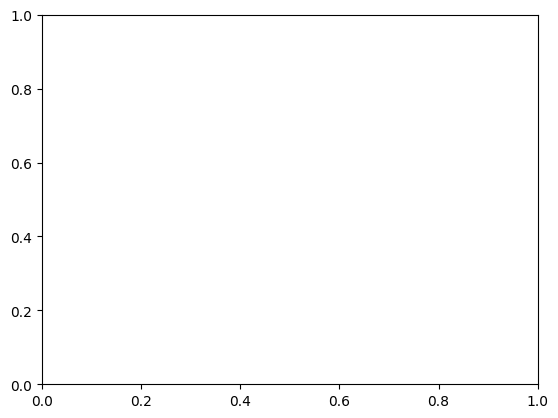

In [52]:
plt.plot(t,ypred)
plt.plot(t,ytest)

##Section for ARIMA model

###Dataset

####function

In [ ]:
# create the dataset

def dataset_ARIMA(pcap,csv,col,c):
    X,y = Xy_lat(pcap[0],csv[0])
    df=pd.DataFrame(X)
    for i in range(1,len(csv)):
        X1,y1 = Xy_lat(pcap[i],csv[i])
        X1d=pd.DataFrame(X1)
        df=pd.concat([df,X1d], ignore_index=True)

    # Divide the dataset into training and testing sets
    #df.columns=col
    #return df,0,0
    lim=0.80
    df1=df.iloc[0:int(len(df)*lim)]
    df2=df.iloc[int(len(df)*lim):len(df)]

    Xtrain=df1.to_numpy()
    Xtest=df2.to_numpy()

    Ma = max(Xtrain)
    Mi = min(Xtrain)

    scaler = preprocessing.MinMaxScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    Xtr = pd.DataFrame(Xtrain)
    Xte = pd.DataFrame(Xtest)

    X = pd.concat([Xtr,Xte], ignore_index=True)

    X.columns=col

    return X,Ma,Mi

####Build dataset

In [ ]:
data = 1   # 0=dataset1 - 1=dataset2 - 2=dataset3

feat = len(col[1])

X,Ma,Mi=dataset_ARIMA(pcapfile[data], csvfile[data], col[1], 1)

###Model parameters

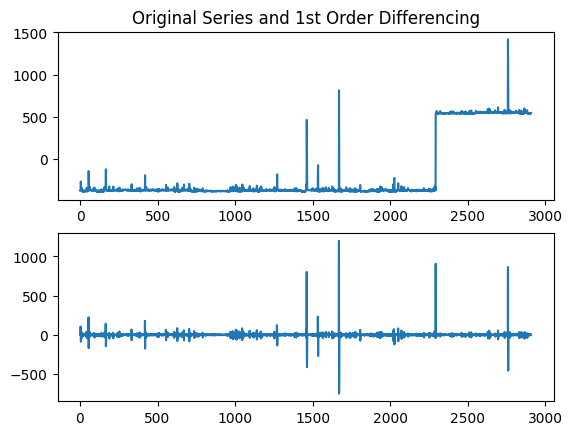

In [ ]:
from statsmodels.graphics. tsaplots import plot_acf
import matplotlib.pyplot as plt
f = plt.figure()
ax1 = f.add_subplot(211)
ax1.set_title('Original Series and 1st Order Differencing')
ax1.plot(X.Latency)

ax2 = f.add_subplot(212)
#ax2.set_title('1st Order Differencing')
ax2.plot(X.Latency.diff())
#plot_acf(X.Latency)

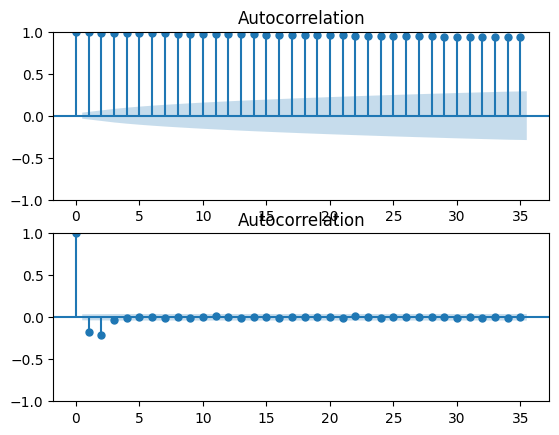

In [ ]:
f = plt.figure()
ax1 = f.add_subplot(211)
ax1.set_title('1st Order Differencing')
plot_acf(X.Latency.dropna(), ax=ax1)

ax2 = f.add_subplot(212)
plot_acf(X.Latency.diff().dropna(), ax=ax2)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X.Latency.dropna())
print('p-value:',result[1])

result = adfuller(X.Latency.diff().dropna())
print('p-value:',result[1])

result = adfuller(X.Latency.diff().diff().dropna())
print('p-value:',result[1])

p-value: 0.8908366776788557
p-value: 0.0
p-value: 1.6909545969310125e-29


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


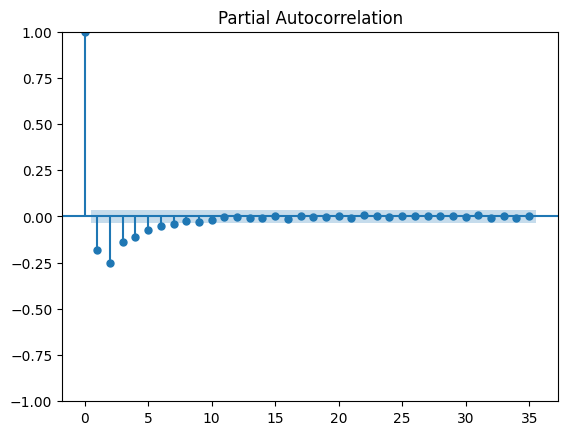

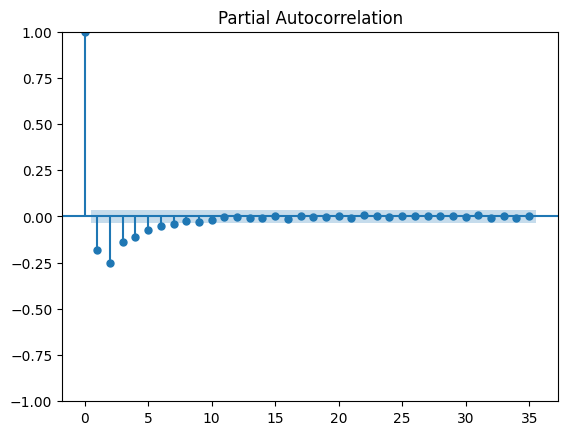

In [ ]:
from statsmodels.graphics. tsaplots import plot_pacf
plot_pacf(X.Latency.diff().dropna())

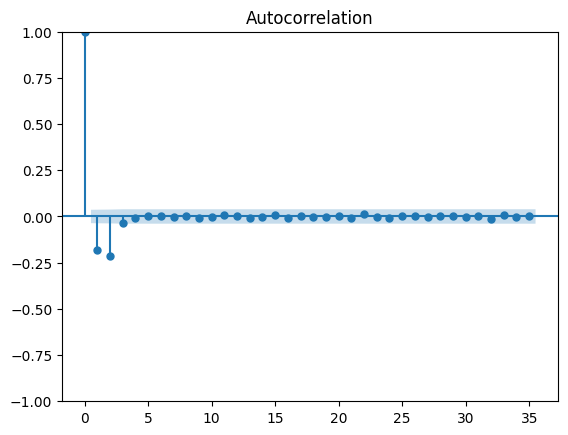

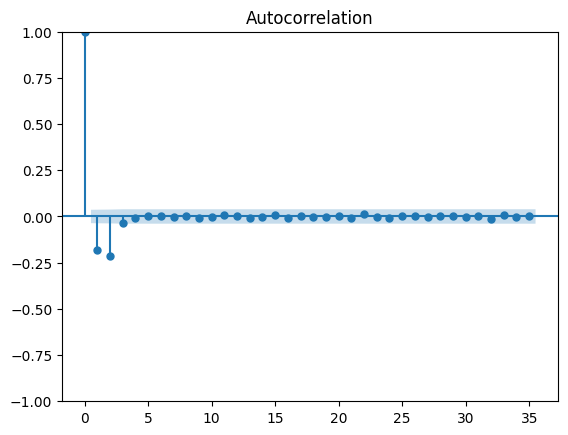

In [ ]:
plot_acf(X.Latency.diff().dropna())

###Test

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
n=len(X.Latency)
k=int(0.8*n)
ypred=[]
ytest=[]
while k<=(n-10):
  arima_model = ARIMA(X.Latency[0:k], order=(1,1,1))
  model = arima_model.fit()
  pred = pd.Series(model.forecast(10), index=X.Latency[k:k+10].index)
  ypred.append(pred.iloc[9])
  ytest.append(X.Latency[k+9])
  k=k+1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

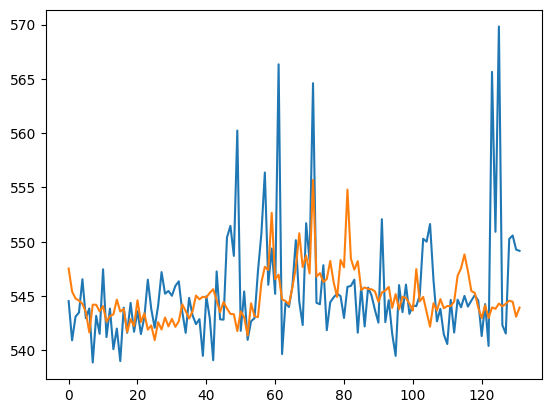

In [ ]:
ypred2=ypred*(Ma-Mi)+Mi
ytest2=ytest*(Ma-Mi)+Mi
t=range(len(ypred))
plt.plot(t,ytest2)
plt.plot(t,ypred2)

In [ ]:
mae(ypred2,ytest2)

3.3302573605784995

#Newdata

In [ ]:
def get_data(file):      # collects the data from the csv file
    data = pd.read_csv(file)
    n=len(data)
    LTE_HO=[]
    MN_HO=[]
    HO=[]
    rsrp=[]
    rsrq=[]
    rsrp4=[]
    rsrq4=[]
    lat1=[]
    lat2=[]
    loss1=[]
    loss2=[]
    loss3=[]
    loss4=[]
    for i in range(n):

        MN_HO.append(data['MN_HO'][i])
        LTE_HO.append(data['LTE_HO'][i])

        if data['MN_HO'][i]+data['LTE_HO'][i]>0:
          HO.append(1)
        else:
          HO.append(0)


        rsrp.append(data['nr-RSRP'][i])
        rsrq.append(data['nr-RSRQ'][i])
        rsrp4.append(data['RSRP'][i])
        rsrq4.append(data['RSRQ'][i])

        lat1.append(data['dl-latency'][i])
        lat2.append(data['ul-latency'][i])

        loss1.append(data['dl-loss'][i])
        loss2.append(data['ul-loss'][i])
        loss3.append(data['dl-exc-lat'][i])
        loss4.append(data['ul-exc-lat'][i])

    return LTE_HO, MN_HO, HO, rsrp4, rsrq4, rsrp, rsrq, lat1, lat2, loss1, loss2, loss3, loss4


def transfo_pci(HO, rsrp4, rsrq4, rsrp, rsrq, lat1, lat2, loss1, loss2, loss3, loss4):
    time_PCI=[]
    p=[]
    q=[]
    p4=[]
    q4=[]
    la1=[]
    la2=[]
    lo1=[]
    lo2=[]
    lo3=[]
    lo4=[]
    n=len(HO)
    k=0
    time=0
    for i in range(n):          # go from the the end of the list PCI to the 1st element
        c=HO[n-1-i]
        if c==1:                # if there is a change
            time=0              # we set time to the time of the change
            k=1   # after the first change we see (so the last one in a chronological order), we put k=1
        else:
            time=time+1
        if k==1:                          # if k==1, we take the values of the fatures
            time_PCI.append([time])    # I did that to ignore the moment after the last change
            p.append(rsrp[n-1-i])         # as we don't know the time before the next change
            q.append(rsrq[n-1-i])
            p4.append(rsrp4[n-1-i])
            q4.append(rsrq4[n-1-i])
            la1.append(lat1[n-1-i])
            la2.append(lat2[n-1-i])
            lo1.append(loss1[n-1-i])
            lo2.append(loss2[n-1-i])
            lo3.append(loss3[n-1-i])
            lo4.append(loss4[n-1-i])
    n2=len(time_PCI)
    time_PCI2=[]
    p2=[]
    q2=[]
    p42=[]
    q42=[]
    la12=[]
    la22=[]
    lo12=[]
    lo22=[]
    lo32=[]
    lo42=[]
    for i in range(n2):
        time_PCI2.append(time_PCI[n2-1-i])
        p2.append(p[n2-1-i])
        q2.append(q[n2-1-i])
        p42.append(p4[n2-1-i])
        q42.append(q4[n2-1-i])
        la12.append(la1[n2-1-i])
        la22.append(la2[n2-1-i])
        lo12.append(lo1[n2-1-i])
        lo22.append(lo2[n2-1-i])
        lo32.append(lo3[n2-1-i])
        lo42.append(lo4[n2-1-i])
    return time_PCI2,p2,q2,p42,q42,la12,la22,lo12,lo22,lo32,lo42

def transf_time(t):       # transforms a time in string to an int
    hours=int(t[0]+t[1])
    minutes=int(t[3]+t[4])
    seconds=int(t[6]+t[7])
    t2=seconds+60*minutes+3600*hours
    return t2

def avglat(l1,l2):
  n=len(l1)
  l=[]
  for i in range(n):
    l.append((l1[i]+l2[i])/2)
  return l

def sumloss(l1,l2,l3,l4):
  l=[]
  for i in range(len(l1)):
    l.append(l1[i]+l2[i]+l3[i]+l4[i])
  return l

def enlarging_loss(loss):
  n=len(loss)
  loss2=loss.copy()
  for i in range(n):
    if loss[i]>0:
      v=loss[i]
      k=0
      while v>=0.01:
        loss2,v=update_Xd(loss2,i-k,v)
        loss2,v=update_Xu(loss2,i+k,v)
        k=k+1
  return loss2

def update_Xd(X,k,v):
  if k-1>=0:
    if X[k-1]<0.95*v:
      X[k-1]=0.95*v     # the element before the non-zero value is equal to 0.95*the value
  return X,v

def update_Xu(X,k,v):
  if k+1<len(X):
    if X[k+1]<0.95*v:
      X[k+1]=0.95*v     # the element after the non-zero value is equal to 0.95*the value
  return X,0.95*v

def Xy_latlat(csv):
    LTE_HO, MN_HO, HO, rsrp4, rsrq4, rsrp, rsrq, lat1, lat2, loss1, loss2, loss3, loss4 = get_data(csv)
    lat=avglat(lat1,lat2)
    (n,)=np.shape(lat)
    X=np.zeros((n,1))
    Y=[]
    for i in range(n):
        X[i]=lat[i]
        Y.append(lat[i])

    return X,Y

def Xy_timechange(csv):
    LTE_HO, MN_HO, HO, rsrp4, rsrq4, rsrp, rsrq, lat1, lat2, loss1, loss2, loss3, loss4 = get_data(csv)
    time_PCI2,p2,q2,p42,q42,la12,la22,lo12,lo22,lo32,lo42 = transfo_pci(HO, rsrp4, rsrq4, rsrp, rsrq, lat1, lat2, loss1, loss2, loss3, loss4)
    lat=avglat(la12,la22)
    (n,)=np.shape(lat)
    X=np.zeros((n,2))
    Y=[]
    for i in range(n):
        X[i,0]=p42[i]
        X[i,1]=q42[i]
        #X[i,2]=lat[i]
        Y.append(time_PCI2[i])

    return X,Y

def Xy_enloss(csv):
    LTE_HO, MN_HO, HO, rsrp4, rsrq4, rsrp, rsrq, lat1, lat2, loss1, loss2, loss3, loss4 = get_data(csv)
    time_PCI2,p2,q2,p42,q42,la12,la22,lo12,lo22,lo32,lo42 = transfo_pci(HO, rsrp4, rsrq4, rsrp, rsrq, lat1, lat2, loss1, loss2, loss3, loss4)
    lat=avglat(la12,la22)
    loss=sumloss(lo12,lo22,lo32,lo42)
    enloss=enlarging_loss(loss)
    (n,)=np.shape(lat)
    X=np.zeros((n,3))
    Y=[]
    Z=[]
    for i in range(n):
        X[i,0]=p2[i]
        X[i,1]=q2[i]
        X[i,2]=lat[i]
        Y.append(loss[i])

    return X,Y

In [ ]:
def dataset_test(csv, col, c, time_step, time_pred,tes):

    # Create a dataset with the features

    if c==1:
      X,y=Xy_latlat(csv[0])
    if c==2:
      X,y=Xy_timechange(csv[0])
    if c==3:
      X,y=Xy_enloss(csv[0])
    df=pd.DataFrame(X)
    dyy=pd.DataFrame(y)
    for i in range(1,len(csv)):
        if c==1:
          X1,y1=Xy_latlat(csv[i])
        if c==2:
          X1,y1=Xy_timechange(csv[i])
        if c==3:
          X1,y1=Xy_enloss(csv[i])
        X1d=pd.DataFrame(X1)
        y1d=pd.DataFrame(y1)
        df=pd.concat([df,X1d], ignore_index=True)
        dyy=pd.concat([dyy,y1d])

    df.columns=col

    dyy.columns=['y']
    dy=dyy['y']

    #return df

    x=df.to_numpy()
    y_tot=dy.to_numpy()

    if tes==1:
      Ma=max(y_tot)
      Mi=min(y_tot)
      return x, y_tot, Ma, Mi

In [ ]:
#temporaire
# create the dataset

def dataset_train(pcap, csv, col, c, time_step, time_pred):

    # Create a dataset with the features

    if c==0:
      X,y=Xy_lat2(pcap[0],csv[0])
    if c==1:
      X,y=Xy_lat(pcap[0],csv[0])
    if c==2:
      X,y=Xy_change(pcap[0],csv[0])
    if c==3:
      X,y=Xy_change2(pcap[0],csv[0])
    if c==4:
      X,y=Xy_loss2(pcap[0],csv[0])
    if c==5:
      X,y=Xy_loss(pcap[0],csv[0])
    df=pd.DataFrame(X)
    dyy=pd.DataFrame(y)
    for i in range(1,len(csv)):
        if c==0:
          X1,y1=Xy_lat2(pcap[i],csv[i])
        if c==1:
          X1,y1=Xy_lat(pcap[i],csv[i])
        if c==2:
          X1,y1=Xy_change(pcap[i],csv[i])
        if c==3:
          X1,y1=Xy_change2(pcap[i],csv[i])
        if c==4:
          X1,y1=Xy_loss2(pcap[i],csv[i])
        if c==5:
          X1,y1=Xy_loss(pcap[i],csv[i])
        X1d=pd.DataFrame(X1)
        y1d=pd.DataFrame(y1)
        df=pd.concat([df,X1d], ignore_index=True)
        dyy=pd.concat([dyy,y1d])

    df.columns=col

    dyy.columns=['y']
    dy=dyy['y']

    #return df

    x=df.to_numpy()
    y_tot=dy.to_numpy()

    # Scale the data

    Mi=min(y_tot)
    Ma=max(y_tot)

    return x, y_tot, Ma, Mi

def rebuild_dataset(X,y,t1,t2):
  (nb_sample, nb_features) = np.shape(X)
  X_rebuilt = []
  y_rebuilt = []
  for i in range(nb_sample-t1-t2+1):
    L=[]
    L = add_input(X,i,L,t1,nb_features)
    X_rebuilt.append(L)
    y_rebuilt.append(y[t1+t2+i-1])

  return X_rebuilt, y_rebuilt

def add_input(X,i,L,t1,nb_features):
  for j in range(t1):
    L2=[]
    for k in range(nb_features):
      L2.append(X[i+j][k])            # we add the elements from rank i to rank (i + t1) for each feature
    L.append(L2)
  return L

In [ ]:
def scaler(Xtr, ytr, Xte, yte):
  scalerX = preprocessing.MinMaxScaler().fit(Xtr)
  Xtr = scalerX.transform(Xtr)
  Xte = scalerX.transform(Xte)
  scalery = preprocessing.MinMaxScaler().fit(ytr)
  ytr = scalery.transform(ytr)
  yte = scalery.transform(yte)
  return Xtr, ytr, Xte, yte

In [ ]:
def model(hunits, input_shape, act, type_lay, Xtr, ytr, ep):
  model = Sequential()
  model = add_lay(model, hunits, input_shape, act, 'av', type_lay)
  model = add_lay(model, hunits, input_shape, act, 'ap', type_lay)
  model.add(Dense(units=1, activation=act[1]))
  model.compile(loss='mean_absolute_error', optimizer='adam')

  model.fit(np.array(Xtr), np.array(ytr), epochs=ep, verbose=0)
  return model


def add_lay(model, hidden_units, input_shape, activation, p, type_layer):
    if p=='av':
      if type_layer==1:
        model.add(SimpleRNN(hidden_units, input_shape=input_shape, return_sequences=True, activation=activation[0]))
      if type_layer==2:
        model.add(LSTM(hidden_units, input_shape=input_shape, return_sequences=True, activation=activation[0]))
    else:
      if type_layer==1:
        model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
      if type_layer==2:
        model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0]))
    return model

def predicts(model,Xte,Ma,Mi):
  ypred = model.predict(Xte,verbose=0)
  ypred = ypred*(Ma-Mi)+Mi
  return ypred


In [ ]:
def CDF(data):
  count, bins_count = np.histogram(data, bins=100)

  # finding the PDF of the histogram using count values
  pdf = count / sum(count)

  # using numpy np.cumsum to calculate the CDF
  # We can also find using the PDF values by looping and adding
  cdf = np.cumsum(pdf)

  # plotting PDF and CDF
  #plt.plot(bins_count[1:], pdf, color="red", label="PDF")
  plt.plot(bins_count[1:], cdf, label="CDF")
  plt.legend()
  return(bins_count[1:],cdf)

In [ ]:
def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf
from scipy import stats
def ks_2samp(sample1, sample2):
    # Gets all observations
    observations = np.concatenate((sample1, sample2))
    observations.sort()
    # Sorts the samples
    sample1.sort()
    sample2.sort()
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in observations:
        cdf_sample1 = cdf(sample = sample1, x  = x)
        cdf_sample2 = cdf(sample = sample2, x  = x)
        D_ks.append(abs(cdf_sample1 - cdf_sample2))
    ks_stat = max(D_ks)
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(len(sample1)), float(len(sample2))
    en = m * n / (m + n)
    p_value = stats.kstwo.sf(ks_stat, np.round(en))
    k=virgule(ks_stat)
    p=virgule(p_value)
    #return {"ks_stat": k, "p_value" : p}
    print( {"ks_stat": k, "p_value" : p})

In [ ]:
def virgule(a):
  c=str(a)
  c2=''
  for i in range(len(c)):
    if c[i]=='.':
      c2=c2+','
    else:
      c2=c2+c[i]
  return c2

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

def nn_regression( solv, a, lay, Xtrain, ytrain, Xtest, Ma, Mi ):
    regr = MLPRegressor(random_state=1, max_iter=50000, hidden_layer_sizes=lay, alpha=a, solver=solv, learning_rate_init=1e-2, shuffle=False).fit(Xtrain, ytrain)

    ypred = regr.predict(Xtest)
    ypred=ypred*(Ma-Mi)+Mi
    return ypred

In [ ]:
d0=['2023-03-26_qc00_#01_All.csv','2023-03-26_qc00_#02_All.csv','2023-03-26_qc00_#03_All.csv']
d1=['2023-03-26_qc02_#01_All.csv','2023-03-26_qc02_#02_All.csv','2023-03-26_qc02_#03_All.csv']
d2=['2023-03-26_qc03_#01_All.csv','2023-03-26_qc03_#02_All.csv','2023-03-26_qc03_#03_All.csv']
d3=['2023-04-01_qc03_exp2_#01_All.csv','2023-04-01_qc03_exp2_#02_All.csv','2023-04-01_qc03_exp2_#03_All.csv','2023-04-01_qc03_exp2_#04_All.csv']
d4=['2023-04-10_qc00_exp1_#01_All.csv','2023-04-10_qc00_exp1_#02_All.csv']
d5=['2023-04-10_qc01_exp1_#01_All.csv','2023-04-10_qc01_exp1_#02_All.csv']
d6=['2023-04-10_qc01_exp3_#01_All.csv','2023-04-10_qc01_exp3_#02_All.csv']
d7=['2023-04-10_qc02_exp1_#01_All.csv','2023-04-10_qc02_exp1_#02_All.csv']
d8=['2023-04-10_qc03_exp1_#01_All.csv','2023-04-10_qc03_exp1_#02_All.csv']
d9=['2023-04-17_qc00_exp1_#01_All.csv','2023-04-17_qc00_exp1_#02_All.csv']
d10=['2023-04-17_qc00_exp2_#01_All.csv','2023-04-17_qc00_exp2_#02_All.csv','2023-04-17_qc00_exp2_#03_All.csv','2023-04-17_qc00_exp2_#04_All.csv']
d11=['2023-04-17_qc00_exp3_#01_All.csv','2023-04-17_qc00_exp3_#02_All.csv','2023-04-17_qc00_exp3_#03_All.csv','2023-04-17_qc00_exp3_#04_All.csv']
d12=['2023-04-17_qc00_exp4_#01_All.csv','2023-04-17_qc00_exp4_#02_All.csv','2023-04-17_qc00_exp4_#03_All.csv','2023-04-17_qc00_exp4_#04_All.csv']
d13=['2023-04-17_qc00_exp5_#01_All.csv','2023-04-17_qc00_exp5_#02_All.csv']
d14=['2023-04-17_qc00_exp6_#01_All.csv','2023-04-17_qc00_exp6_#02_All.csv']
d15=['2023-04-17_qc02_exp4_#01_All.csv','2023-04-17_qc02_exp4_#02_All.csv','2023-04-17_qc02_exp4_#03_All.csv','2023-04-17_qc02_exp4_#04_All.csv']
d16=['2023-05-07_sm00_#01_All.csv','2023-05-07_sm00_#03_All.csv','2023-05-07_sm00_#05_All.csv','2023-05-07_sm00_#06_All.csv']
d17=['2023-05-24_sm00_#01_All.csv','2023-05-24_sm00_#02_All.csv','2023-05-24_sm00_#03_All.csv','2023-05-24_sm00_#04_All.csv',
     '2023-05-24_sm00_#05_All.csv','2023-05-24_sm00_#06_All.csv','2023-05-24_sm00_#07_All.csv','2023-05-24_sm00_#08_All.csv']
d18=['2023-05-26_sm00_#01_All.csv','2023-05-26_sm00_#02_All.csv','2023-05-26_sm00_#03_All.csv','2023-05-26_sm00_#04_All.csv',
     '2023-05-26_sm00_#05_All.csv','2023-05-26_sm00_#06_All.csv','2023-05-26_sm00_#07_All.csv','2023-05-26_sm00_#08_All.csv','2023-05-26_sm00_#09_All.csv']
d19=['2023-06-12_sm00_#01_All.csv','2023-06-12_sm00_#03_All.csv','2023-06-12_sm00_#04_All.csv','2023-06-12_sm00_#05_All.csv',
     '2023-06-12_sm00_#06_All.csv','2023-06-12_sm00_#07_All.csv','2023-06-12_sm00_#08_All.csv','2023-06-12_sm00_#09_All.csv','2023-06-12_sm00_#10_All.csv']
d20=['2023-06-13_sm00_#02_All.csv','2023-06-13_sm00_#03_All.csv','2023-06-13_sm00_#04_All.csv','2023-06-13_sm00_#05_All.csv',
     '2023-06-13_sm00_#06_All.csv','2023-06-13_sm00_#07_All.csv','2023-06-13_sm00_#08_All.csv','2023-06-13_sm00_#09_All.csv','2023-06-13_sm00_#10_All.csv']
d=[d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20]

In [ ]:
data = 0   # 0=dataset1 - 1=dataset2 - 2=dataset3
c = 3   # 0=lat with all features - 1=only lat - 2=change - 3=change with 3 feat - 4=enlarged loss - 5=loss

t_step = 1    # time taken in the input
t_pred = 0     # time before the prediction

feat = 3
input_shape = (t_step, feat)

#Xtrain,ytrain, Ma, Mi = dataset_train(pcapfile[data], csvfile[data], col[c], c, t_step, t_pred)

In [ ]:
for i in range(len(Xtrain)):
  Xtrain[i]=Xtrain[i]/1000
  ytrain[i]=ytrain[i]/1000

In [ ]:
data3=d0
#col2=['Latency']
col2=['RSRP','RSRQ','lat']
feat=3
ch=3     # 1: lat  2: change  3: loss
Xtrain,ytrain,Ma,Mi=dataset_test(data3, col2, ch, t_step, t_pred,1)
#print(virgule(100*tauxpl(ytrain)))
#ytrain=enlarging_loss(ytr)
#r=virgule(ma1-mi1)
#print(virgule(Ma-Mi))

In [ ]:
data3=d10
#col2=['Latency']
col2=['RSRP','RSRQ','lat']
feat=3
ch=3     # 1: lat  2: change
Xtest,ytest,ma1,mi1=dataset_test(data3, col2, ch, t_step, t_pred,1)
#print(virgule(100*tauxpl(ytest)))
#ytest=enlarging_loss(yte)
#r=virgule(ma1-mi1)
#print(r)

0,016042780748663103


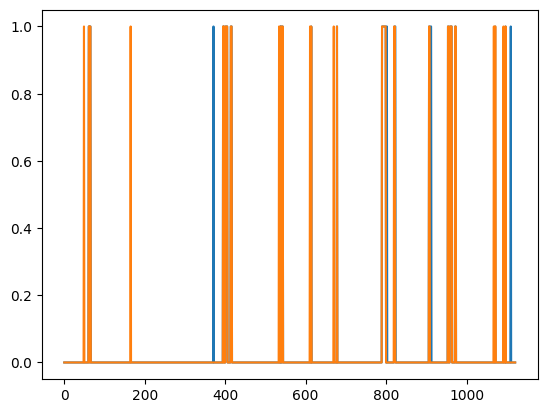

In [ ]:
#"""
#Xtrain,ytrain,Xtest,ytest = scaler(Xtrain, ytrain.reshape(-1, 1), Xtest, ytest.reshape(-1, 1))
solv = 'lbfgs'
alpha=1e-2
layer=6
def cl(y):
  n=len(y)
  for i in range(n):
    if y[i]>50:
      y[i]=1
    else:
      y[i]=0
  return y

ytrain=cl(ytrain)
ytest=cl(ytest)

def nn_classification( solv, a, lay, Xtrain, ytrain, Xtest ):
    scaler = preprocessing.StandardScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)
    clf = MLPClassifier(solver=solv, alpha=a, hidden_layer_sizes=lay, random_state=1,max_iter=10000)
    clf.fit(Xtrain,ytrain)
    return clf.predict(Xtest)
#ypred = nn_regression(solv,alpha,layer,Xtrain,ytrain,Xtest,Ma,Mi)
ypred = nn_classification(solv,alpha,layer,Xtrain,ytrain,Xtest)
#"""
ytest2=[]
for i in range(len(ytest)):
  #ytest2.append(ytest[i]*(Ma-Mi)+Mi)
  ytest2.append(ytest[i])
t=range(len(ypred))
ypred2=[]
for i in range(len(ypred)):
  #if ypred[i]>1000:
    #ypred[i]=1000
  ypred2.append(ypred[i]-min(ypred))
#print(virgule(mae(ypred2,ytest2)))
print(virgule(mae(ypred,ytest2)))
#plt.plot(t,ypred2)
#plt.plot(t,ytest2)
#plt.show()
plt.plot(t,ypred)
plt.plot(t,ytest2)

In [ ]:
def tauxpl(y):
  c=0
  for i in range(len(y)):
    if y[i]>1:
      c=c+1
  return c/len(y)

In [ ]:
def tpp(lim):
  fp=0
  fn=0
  tp=0
  tn=0
  for i in range(len(ypred)):
    #ypred[i]=ypred[i]-ypred[1000]
    if ytest2[i]>50:
      if ypred[i]>lim:
        tp=tp+1
      else:
        fn=fn+1
    else:
      if ypred[i]>lim:
        fp=fp+1
      else:
        tn=tn+1
  return fp,fn,tp,tn

def met(fp,fn,tp,tn):
  fpr=fp/(fp+tn)
  tpr=tp/(tp+fn)
  return fpr,tpr

fpr=[0,1]
tpr=[0,1]
n=int(max(ytest2)[0])
for i in range(n+1):
  fp,fn,tp,tn=tpp(i)
  a,b=met(fp,fn,tp,tn)
  fpr.append(a)
  tpr.append(b)


-------------
20


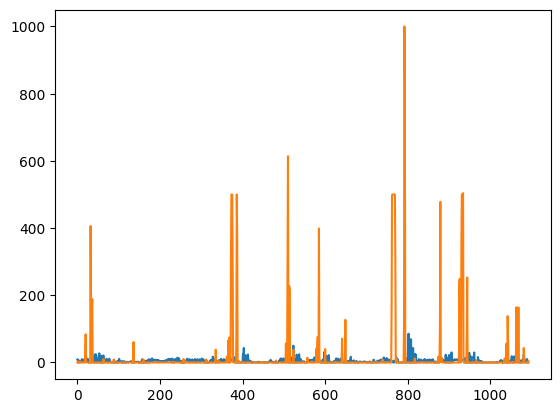

{'fp': 3, 'fn': 54, 'tp': 0, 'tn': 1036}
0,0
-------------
21


KeyboardInterrupt: ignored

In [ ]:
for i in range(20,24):
  print('-------------')
  print(i)
  t_step = i    # time taken in the input
  t_pred = 10     # time before the prediction

  feat = 3
  input_shape = (t_step, feat)

  data3=d0
  #col2=['Latency']
  col2=['RSRP','RSRQ','lat']
  feat=3
  ch=3     # 1: lat  2: change  3: loss
  Xtrain,ytrain,Ma,Mi=dataset_test(data3, col2, ch, t_step, t_pred,1)

  data3=d10
  #col2=['Latency']
  col2=['RSRP','RSRQ','lat']
  feat=3
  ch=3     # 1: lat  2: change
  Xtest,ytest,ma1,mi1=dataset_test(data3, col2, ch, t_step, t_pred,1)

  Xtrain,ytrain,Xtest,ytest = scaler(Xtrain, ytrain.reshape(-1, 1), Xtest, ytest.reshape(-1, 1))

  Xtr,ytr=rebuild_dataset(Xtrain,ytrain,t_step,t_pred)
  Xte,yte=rebuild_dataset(Xtest,ytest,t_step,t_pred)

  ypred,ytest2,t=testo(Xtr,ytr,Xte,yte,Ma,Mi)
  plt.plot(t,ypred)
  plt.plot(t,ytest2)
  plt.show()

  fp=0
  fn=0
  tp=0
  tn=0
  lim=50
  for i in range(len(ypred)):
    if ytest2[i]>lim:
      if ypred[i]>lim:
        tp=tp+1
      else:
        fn=fn+1
    else:
      if ypred[i]>lim:
        fp=fp+1
      else:
        tn=tn+1
  print({"fp": fp, "fn": fn, "tp": tp, "tn": tn})

  def F1(fp,fn,tp):
    f=2*tp/(2*tp+fp+fn)
    return f

  print(virgule(F1(fp,fn,tp)))

In [ ]:
fp=0
fn=0
tp=0
tn=0
lim=50
for i in range(len(ypred)):
  if ytest2[i]>lim:
    if ypred[i]>lim:
      tp=tp+1
    else:
      fn=fn+1
  else:
    if ypred[i]>lim:
      fp=fp+1
    else:
      tn=tn+1
print({"fp": fp, "fn": fn, "tp": tp, "tn": tn})

def F1(fp,fn,tp):
  f=2*tp/(2*tp+fp+fn)
  return f

virgule(F1(fp,fn,tp))

{'fp': 3, 'fn': 7, 'tp': 47, 'tn': 1065}


'0,9038461538461539'

In [ ]:
{'fp': 0, 'fn': 54, 'tp': 0, 'tn': 1058}

In [ ]:
#data2=d7

def trainset(data2):
  #col2=['Latency']
  col2=['RSRP','RSRQ']
  feat=len(col2)
  Xtrain,ytrain,Ma,Mi=dataset_test(data2, col2, 2, t_step, t_pred,1)
  return Xtrain,ytrain,Ma,Mi


In [ ]:
#data3=d2
def testset(data3):
  #col2=['Latency']
  col2=['RSRP','RSRQ']
  feat=len(col2)
  Xtest,ytest,ma1,mi1=dataset_test(data3, col2, 2, t_step, t_pred,1)
  print(virgule(ma1-mi1))
  return Xtest,ytest
#r=virgule(ma1-mi1)
#print(r)

In [ ]:
Xtrain,ytrain,Xtest,ytest = scaler(Xtrain.reshape(-1, 1), ytrain.reshape(-1, 1), Xtest.reshape(-1, 1), ytest.reshape(-1, 1))

In [ ]:
Xtrain,ytrain,Xtest,ytest = scaler(Xtrain, ytrain.reshape(-1, 1), Xtest, ytest.reshape(-1, 1))

In [ ]:
Xtr,ytr=rebuild_dataset(Xtrain,ytrain,t_step,t_pred)
Xte,yte=rebuild_dataset(Xtest,ytest,t_step,t_pred)

MAE
[5,23941857]
MAE 60
[1,65432996]
MAE 30
[1,36083788]


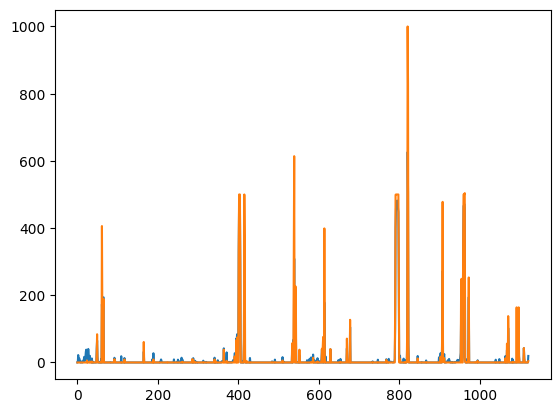

In [ ]:
ypred,ytest2,t=testo(Xtr,ytr,Xte,yte,Ma,Mi)
plt.plot(t,ypred)
plt.plot(t,ytest2)

In [ ]:
def testo(Xtr,ytr,Xte,yte,Ma,Mi):
  time = 0      # =1 if we predict the time before the change of base station, =0 otherwise
  error = 2     # 1: F1score - 2: MAE - 3: NZ MAE - 60: MAE 60 - 30: MAE 30
  # negative number: get MAE, MAE60 and MAE30

  hunits=100
  nblayer=2
  type_lay = 1  # 1: SimpleRNN - 2: LSTM
  act = ['tanh','tanh']
  ep = 10

  mod=model(hunits, input_shape, act, type_lay, Xtr, ytr, ep)

  yp=np.zeros(len(yte))
  for i in range(50):
    ypred = predicts(mod, Xte, Ma, Mi)
    if i==0:
      yp=ypred
    else:
      for j in range(len(ypred)):
        yp[j]=yp[j]+ypred[j]
  ypred=yp/50

  for i in range(len(ypred)):
    ypred[i]=max(ypred[i],0)

  ytest2=[]
  for i in range(len(yte)):
    ytest2.append(yte[i]*(Ma-Mi)+Mi)

  if error>0:
    e = choice_err(ypred, ytest2, error)
    #print(virgule(e))
  else:
    e1 = mae(ypred,ytest2)
    e2 = mae_alpha(ypred,ytest2,60)
    e3 = mae_alpha(ypred,ytest2,30)
    print('MAE')
    print(virgule(e1))
    print('MAE 60')
    print(virgule(e2))
    print('MAE 30')
    print(virgule(e3))

  t=[]
  if time==1:
    t1=-1
    k=0
    for i in range(len(yte)):
      if t1==-1:
        t.append(i)
        t1=ytest2[i]
      else:
        a=t1-ytest2[i]
        if a>0:
            k=k+a
            t.append(k)
        else:
            k=k+1
            t.append(k)
        t1=ytest2[i]
  else:
      for i in range(len(yte)):
          t.append(i)
  return ypred,ytest2,t

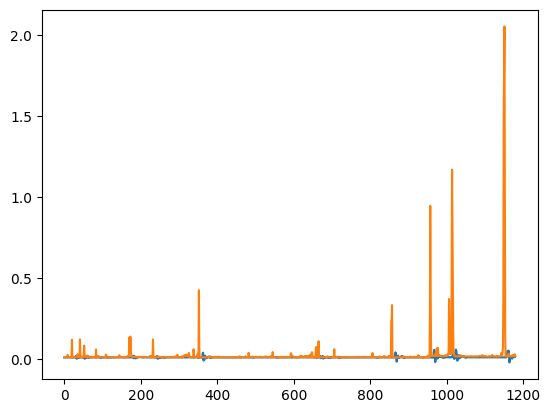

In [ ]:
plt.plot(t,ypred)
plt.plot(t,ytest2)

-------------------------
1
58


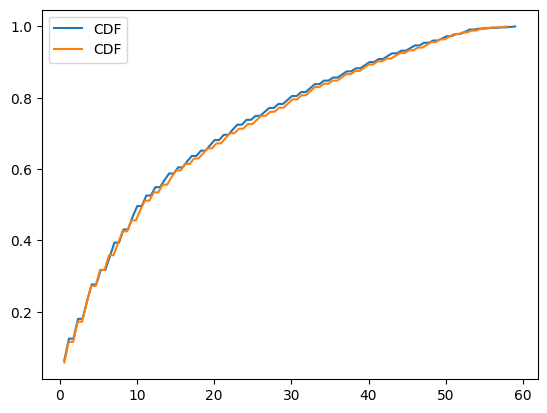

{'ks_stat': '0,014678345869434173', 'p_value': '0,9999904696069699'}
MAE
[12,40941778]
MAE 60
[12,40941778]
MAE 30
[10,01923689]
-------------------------
2
88


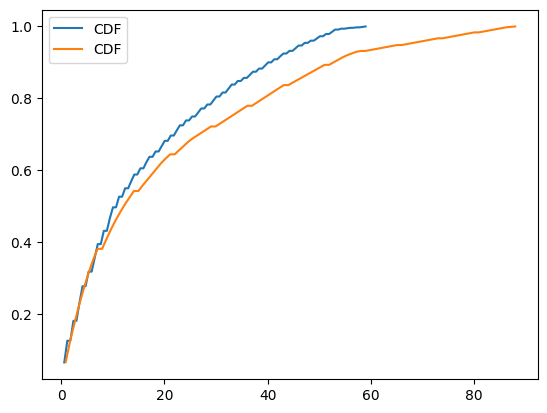

{'ks_stat': '0,08945612278945603', 'p_value': '0,002437202261148944'}
MAE
[16,13198688]
MAE 60
[15,23824425]
MAE 30
[10,48972005]
-------------------------
3
93


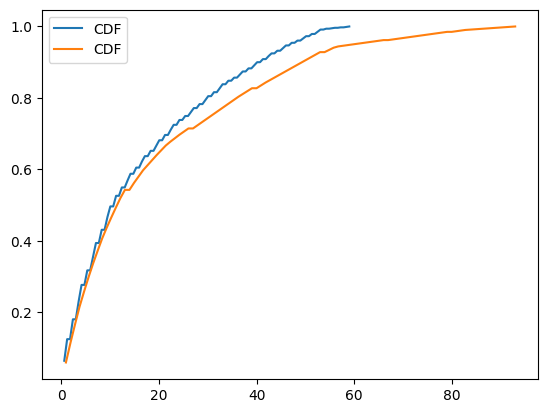

{'ks_stat': '0,06868268978198055', 'p_value': '0,02239373661537893'}
MAE
[15,46557698]
MAE 60
[14,7413777]
MAE 30
[10,63105742]
-------------------------
4
62


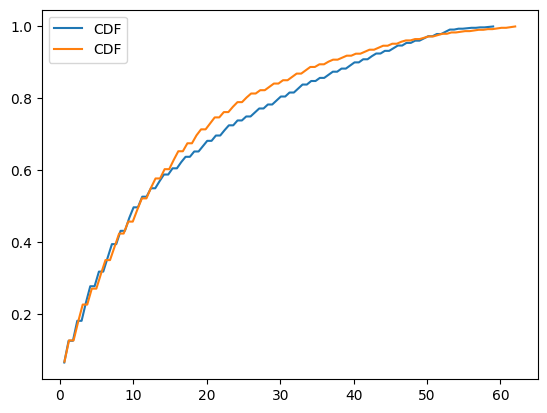

{'ks_stat': '0,05283539855320518', 'p_value': '0,31510892858795747'}
MAE
[10,16419783]
MAE 60
[10,15861125]
MAE 30
[8,35600417]
-------------------------
5
56


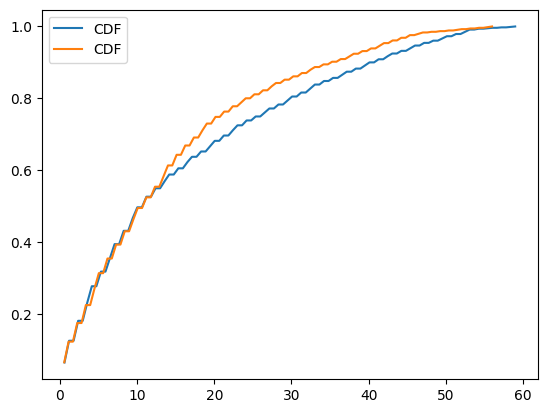

{'ks_stat': '0,06666666666666665', 'p_value': '0,10727454934636693'}
MAE
[10,15239133]
MAE 60
[10,15239133]
MAE 30
[8,7587346]
-------------------------
6
103


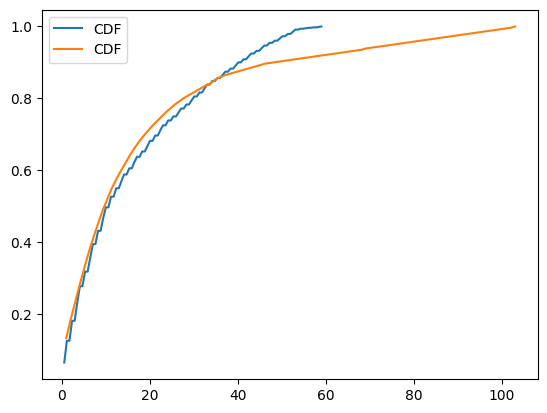

{'ks_stat': '0,08243475543053602', 'p_value': '0,021556351783641417'}
MAE
[14,93288886]
MAE 60
[13,2097559]
MAE 30
[9,70884515]
-------------------------
7
56


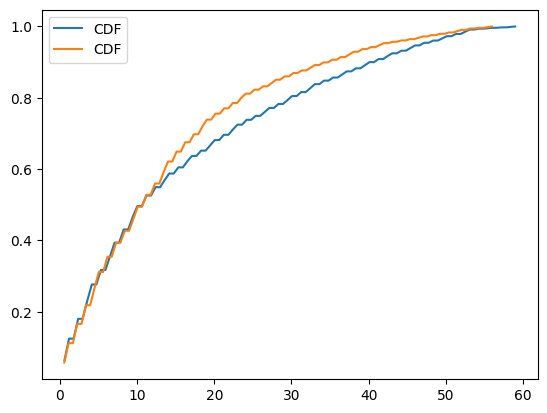

{'ks_stat': '0,0756817763036669', 'p_value': '0,04690293581082494'}
MAE
[10,55766027]
MAE 60
[10,55766027]
MAE 30
[9,14788583]
-------------------------
8
56


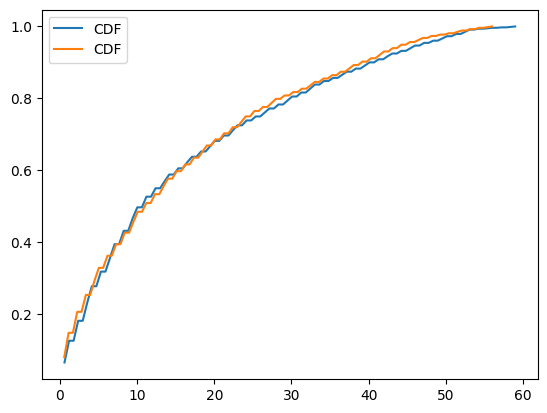

{'ks_stat': '0,02502615609960243', 'p_value': '0,9849980948141216'}
MAE
[11,07081044]
MAE 60
[11,07081044]
MAE 30
[9,08409318]
-------------------------
9
55


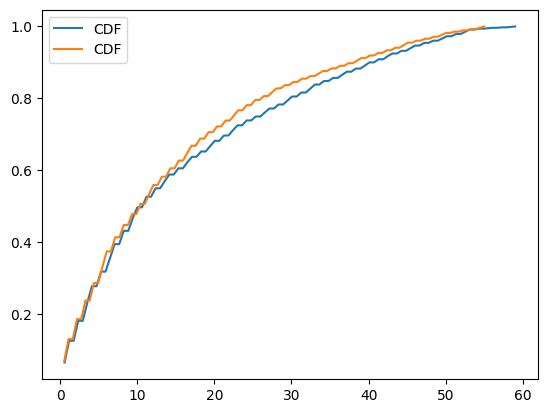

{'ks_stat': '0,0459494203958597', 'p_value': '0,4748996919163131'}
MAE
[10,65657477]
MAE 60
[10,65657477]
MAE 30
[8,88261455]
-------------------------
10
71


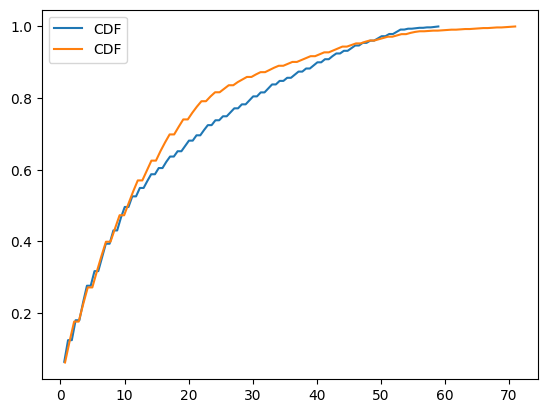

{'ks_stat': '0,0803327391562686', 'p_value': '0,004372138176697629'}
MAE
[10,19402731]
MAE 60
[10,13499331]
MAE 30
[8,31477865]
-------------------------
11
104


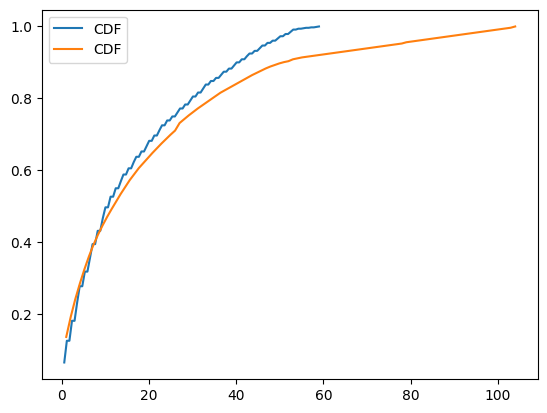

{'ks_stat': '0,08274642539434574', 'p_value': '0,0028908795174306724'}
MAE
[16,02597036]
MAE 60
[14,27993862]
MAE 30
[10,1194448]
-------------------------
12
76


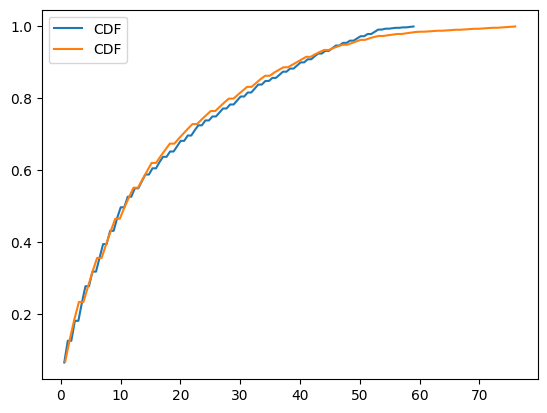

{'ks_stat': '0,021784511784511684', 'p_value': '0,9764544231149014'}
MAE
[11,74561563]
MAE 60
[11,62152804]
MAE 30
[9,36696599]
-------------------------
13
81


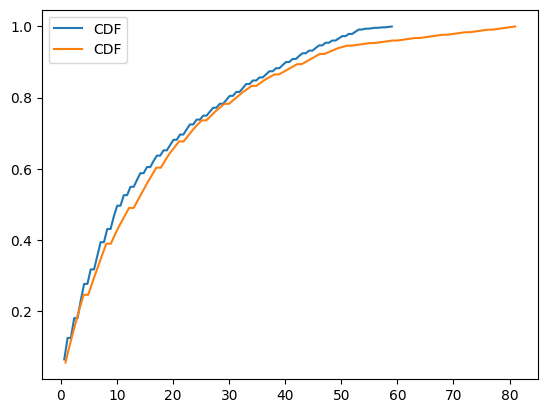

{'ks_stat': '0,05925704279983157', 'p_value': '0,18919253890553045'}
MAE
[13,38852383]
MAE 60
[12,9708023]
MAE 30
[9,9400609]
-------------------------
14
57


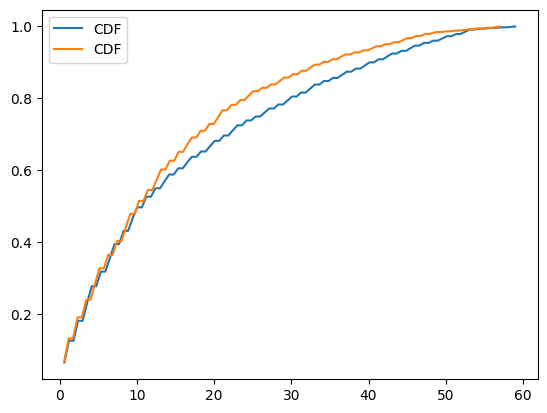

{'ks_stat': '0,07067257010331007', 'p_value': '0,07871154822101067'}
MAE
[10,99385825]
MAE 60
[10,99385825]
MAE 30
[9,60571294]
-------------------------
15
61


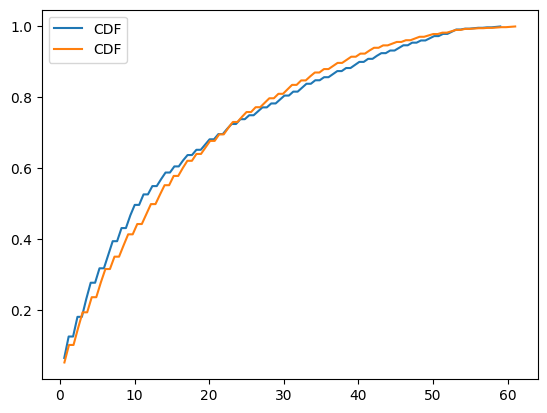

{'ks_stat': '0,05550885512088227', 'p_value': '0,11737402031627953'}
MAE
[11,4590298]
MAE 60
[11,45805609]
MAE 30
[9,60606001]
-------------------------
16
56


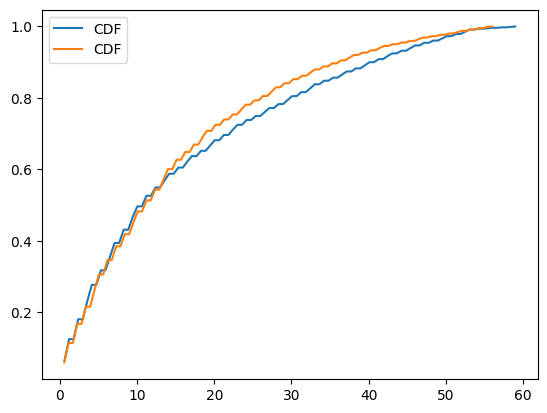

{'ks_stat': '0,04750533741761809', 'p_value': '0,24254525953487638'}
MAE
[10,68576851]
MAE 60
[10,68576851]
MAE 30
[9,09803266]
-------------------------
17
59


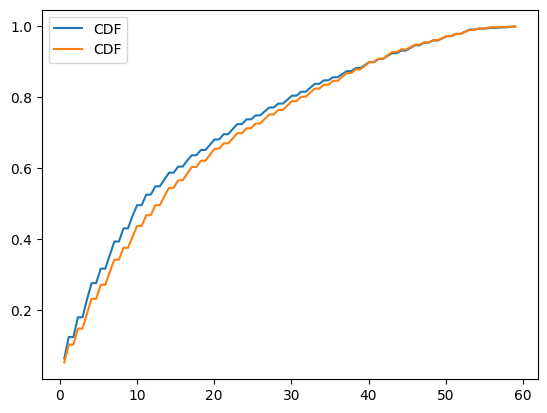

{'ks_stat': '0,05924163096937968', 'p_value': '0,031611655069707534'}
MAE
[11,91792437]
MAE 60
[11,91792437]
MAE 30
[9,60128156]
-------------------------
18
56


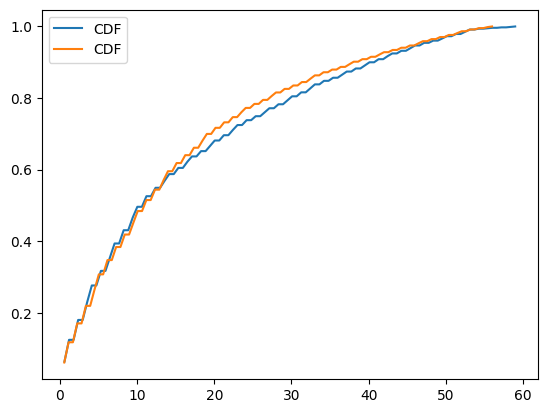

{'ks_stat': '0,03595775102624421', 'p_value': '0,4040476509489189'}
MAE
[10,96492362]
MAE 60
[10,96492362]
MAE 30
[9,06804212]
-------------------------
19
56


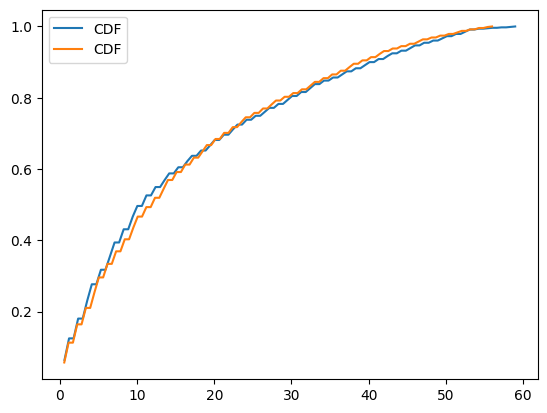

{'ks_stat': '0,03282083795635865', 'p_value': '0,5431429700897991'}
MAE
[11,69859957]
MAE 60
[11,69859957]
MAE 30
[9,69621748]
-------------------------
20
73


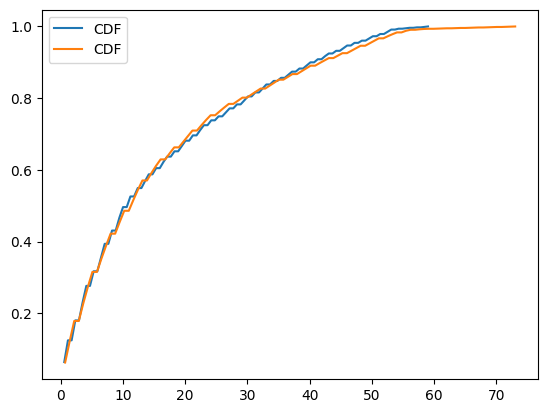

{'ks_stat': '0,014954887516516635', 'p_value': '0,999180901550847'}
MAE
[12,20794255]
MAE 60
[12,16606496]
MAE 30
[9,67227756]


In [ ]:
k=0
input_shape=(t_step,2)
for i in range(0,21):
  if i!=k:
    print('-------------------------')
    print(i)
    Xtrain,ytrain,Ma,Mi=trainset(d[k])
    #Xtrain,ytrain, Ma, Mi = dataset_train(pcapfile[data], csvfile[data], col[c], c, t_step, t_pred)
    if i==0:
      print(Ma-Mi)
    Xtest,ytest=testset(d[i])
    b,m=CDF(ytrain)
    b2,m=CDF(ytest)
    plt.show()
    ks_2samp(ytrain,ytest)
    Xtrain,ytrain,Xtest,ytest = scaler(Xtrain, ytrain.reshape(-1, 1), Xtest, ytest.reshape(-1, 1))
    Xtr,ytr=rebuild_dataset(Xtrain,ytrain,t_step,t_pred)
    Xte,yte=rebuild_dataset(Xtest,ytest,t_step,t_pred)
    testo(Xtr,ytr,Xte,yte,Ma,Mi)